## This is the guvi final project

#### Problem statement: 
We do have an E-commerce dataset, we need to identify or predict who are all coming as 
visitors and converted as out customers. 

In [1]:
# Import packages

import pandas as pd
import numpy as np
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('C:/Sudhakar/Projects/Guvi Final Project/Dataset and Document/classification_data.csv')
df

count_session  count_hit channelGrouping  totals_newVisits  \
0                  9       1194         (Other)                 0   
1                  9       1194         (Other)                 0   
2                 28       1816     Paid Search                 0   
3                  2        299     Paid Search                 0   
4                  2        299     Paid Search                 0   
...              ...        ...             ...               ...   
99995             58      12340     Paid Search                 0   
99996             58      12340     Paid Search                 0   
99997             58      12340     Paid Search                 0   
99998             58      12340     Paid Search                 0   
99999             58      12340     Paid Search                 0   

        device_browser device_operatingSystem  device_isMobile  \
0      GoogleAnalytics                Android             True   
1      GoogleAnalytics                Android             True   
2      GoogleAnalytics                Android             True   
3      GoogleAnalytics                Android             True   
4      GoogleAnalytics                Android             True   
...                ...                    ...              ...   
99995  GoogleAnalytics                    iOS             True   
99996  GoogleAnalytics                    iOS             True   
99997  GoogleAnalytics                    iOS             True   
99998  GoogleAnalytics                    iOS             True   
99999  GoogleAnalytics                    iOS             True   

      device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                    mobile           Sharjah              25.3463  ...   
1                    mobile           Sharjah              25.3463  ...   
2                    mobile             Ajman              25.4052  ...   
3                    mobile         Abu Dhabi              24.4539  ...   
4                    mobile         Abu Dhabi              24.4539  ...   
...                     ...               ...                  ...  ...   
99995                mobile             Dubai              25.2048  ...   
99996                mobile             Dubai              25.2048  ...   
99997                mobile             Dubai              25.2048  ...   
99998                mobile             Dubai              25.2048  ...   
99999                mobile             Dubai              25.2048  ...   

                    latest_keyword  earliest_isTrueDirect  \
0                        (not set)                   True   
1                        (not set)                   True   
2             (automatic matching)                   True   
3      custom0==marketplace&+id==*                   True   
4      custom0==marketplace&+id==*                   True   
...                            ...                    ...   
99995  custom0==marketplace&+id==*                   True   
99996  custom0==marketplace&+id==*                   True   
99997  custom0==marketplace&+id==*                   True   
99998  custom0==marketplace&+id==*                   True   
99999  custom0==marketplace&+id==*                   True   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                     True              1900        0          5617   
1                     True              1900        0          5617   
2                     True              3843        0         77417   
3                     True               592        0          1576   
4                     True               592        0          1576   
...                    ...               ...      ...           ...   
99995                 True             34999        0             0   
99996                 True             34999        0             0   
99997                 True             34999        0             0   
99998                 True             34

### The below mentioned 3 column contain same value for all the 100000 rows so i will delete the those rows

In [4]:
# youtube                        NaN
# days_since_last_visit          NaN
# target_date                    NaN
print(df.youtube.value_counts())
print(df.days_since_last_visit.value_counts())
print(df.target_date.value_counts())

youtube
0    100000
Name: count, dtype: int64
days_since_last_visit
0    100000
Name: count, dtype: int64
target_date
2021-01-01    100000
Name: count, dtype: int64


In [6]:
df.bounce_rate.value_counts()

bounce_rate
0.00    96614
0.04      367
0.14      234
0.03      190
0.06      163
        ...  
0.58        1
0.24        1
0.45        1
1.20        1
1.33        1
Name: count, Length: 92, dtype: int64

## bounce_rate value is not helpful for our prediction, i found this info in later so i delete the column here itself 

bounce_rate
0.00    96614
0.04      367
0.14      234
0.03      190
0.06      163
        ...  
0.58        1
0.24        1
0.45        1
1.20        1
1.33        1
Name: count, Length: 92, dtype: int64

In [7]:
# List of columns to drop
columns_to_drop = ['youtube', 'days_since_last_visit', 'target_date', 'bounce_rate']

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [8]:
df

count_session  count_hit channelGrouping  totals_newVisits  \
0                  9       1194         (Other)                 0   
1                  9       1194         (Other)                 0   
2                 28       1816     Paid Search                 0   
3                  2        299     Paid Search                 0   
4                  2        299     Paid Search                 0   
...              ...        ...             ...               ...   
99995             58      12340     Paid Search                 0   
99996             58      12340     Paid Search                 0   
99997             58      12340     Paid Search                 0   
99998             58      12340     Paid Search                 0   
99999             58      12340     Paid Search                 0   

        device_browser device_operatingSystem  device_isMobile  \
0      GoogleAnalytics                Android             True   
1      GoogleAnalytics                Android             True   
2      GoogleAnalytics                Android             True   
3      GoogleAnalytics                Android             True   
4      GoogleAnalytics                Android             True   
...                ...                    ...              ...   
99995  GoogleAnalytics                    iOS             True   
99996  GoogleAnalytics                    iOS             True   
99997  GoogleAnalytics                    iOS             True   
99998  GoogleAnalytics                    iOS             True   
99999  GoogleAnalytics                    iOS             True   

      device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                    mobile           Sharjah              25.3463  ...   
1                    mobile           Sharjah              25.3463  ...   
2                    mobile             Ajman              25.4052  ...   
3                    mobile         Abu Dhabi              24.4539  ...   
4                    mobile         Abu Dhabi              24.4539  ...   
...                     ...               ...                  ...  ...   
99995                mobile             Dubai              25.2048  ...   
99996                mobile             Dubai              25.2048  ...   
99997                mobile             Dubai              25.2048  ...   
99998                mobile             Dubai              25.2048  ...   
99999                mobile             Dubai              25.2048  ...   

                  earliest_keyword               latest_keyword  \
0                        (not set)                    (not set)   
1                        (not set)                    (not set)   
2                        (not set)         (automatic matching)   
3      custom0==marketplace&+id==*  custom0==marketplace&+id==*   
4      custom0==marketplace&+id==*  custom0==marketplace&+id==*   
...                            ...                          ...   
99995  custom0==marketplace&+id==*  custom0==marketplace&+id==*   
99996  custom0==marketplace&+id==*  custom0==marketplace&+id==*   
99997  custom0==marketplace&+id==*  custom0==marketplace&+id==*   
99998  custom0==marketplace&+id==*  custom0==marketplace&+id==*   
99999  custom0==marketplace&+id==*  custom0==marketplace&+id==*   

       earliest_isTrueDirect  latest_isTrueDirect  num_interactions  bounces  \
0                       True                 True              1900        0   
1                       True                 True              1900        0   
2                       True                 True              3843        0   
3                       True                 True               592        0   
4                       True                 True               592        0   
...                      ...                  ...               ...      ...   
99995                   True                 True             34999        0   
99996                   True           

In [9]:
df.has_converted.value_counts()

has_converted
1    51727
0    48273
Name: count, dtype: int64

In [10]:
df.isnull().sum()


count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_first_visit    0
visits_per_day            0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword          0
latest_keyword            0
earliest_isTrueDirect     0
latest_isTrueDirect 

The above data does not contain any missing or empty values so we can further the process

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  avg_session_time        100000 non-null  float64
 14  avg_session_time_page

In [12]:
le = LabelEncoder()  # Create an instance of LabelEncoder

In [13]:
cols_to_encode = ['channelGrouping', 'device_browser', 'device_operatingSystem', 'device_isMobile', 'device_deviceCategory', 'geoNetwork_region',
    'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium', 'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
    'latest_isTrueDirect', 'products_array']

# Apply Label Encoding to each column
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  int64  
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  int64  
 5   device_operatingSystem  100000 non-null  int64  
 6   device_isMobile         100000 non-null  int64  
 7   device_deviceCategory   100000 non-null  int64  
 8   geoNetwork_region       100000 non-null  int64  
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  avg_session_time        100000 non-null  float64
 14  avg_session_time_page

### All the colums are converted as numerical value, now we can continue the process

In [15]:
df

count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194                0                 0   
1                  9       1194                0                 0   
2                 28       1816                2                 0   
3                  2        299                2                 0   
4                  2        299                2                 0   
...              ...        ...              ...               ...   
99995             58      12340                2                 0   
99996             58      12340                2                 0   
99997             58      12340                2                 0   
99998             58      12340                2                 0   
99999             58      12340                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
1                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
4                   5                       1                1   
...               ...                     ...              ...   
99995               5                       6                1   
99996               5                       6                1   
99997               5                       6                1   
99998               5                       6                1   
99999               5                       6                1   

       device_deviceCategory  geoNetwork_region  geoNetwork_latitude  ...  \
0                          1                 71              25.3463  ...   
1                          1                 71              25.3463  ...   
2                          1                  2              25.4052  ...   
3                          1                  1              24.4539  ...   
4                          1                  1              24.4539  ...   
...                      ...                ...                  ...  ...   
99995                      1                 25              25.2048  ...   
99996                      1                 25              25.2048  ...   
99997                      1                 25              25.2048  ...   
99998                      1                 25              25.2048  ...   
99999                      1                 25              25.2048  ...   

       earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                     3               2                      1   
1                     3               2                      1   
2                     3               1                      1   
3                    89              96                      1   
4                    89              96                      1   
...                 ...             ...                    ...   
99995                89              96                      1   
99996                89              96                      1   
99997                89              96                      1   
99998                89              96                      1   
99999                89              96                      1   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                        1              1900        0          5617   
1                        1              1900        0          5617   
2                        1              3843        0         77417   
3                        1               592        0          1576   
4                        1               592        0          1576   
...                    ...               ...      ...           ...   
99995                    1             34999        0             0   
99996                    1             34999        0             0   
99997           

## Thre is first loaded the saved Numerical Dtaframe

In [ ]:
# df.to_csv("Guvi_Final_Project_Numeric_Dataset.csv", index= False)

### Checking the correlation between the columns, this will help tp predit the result

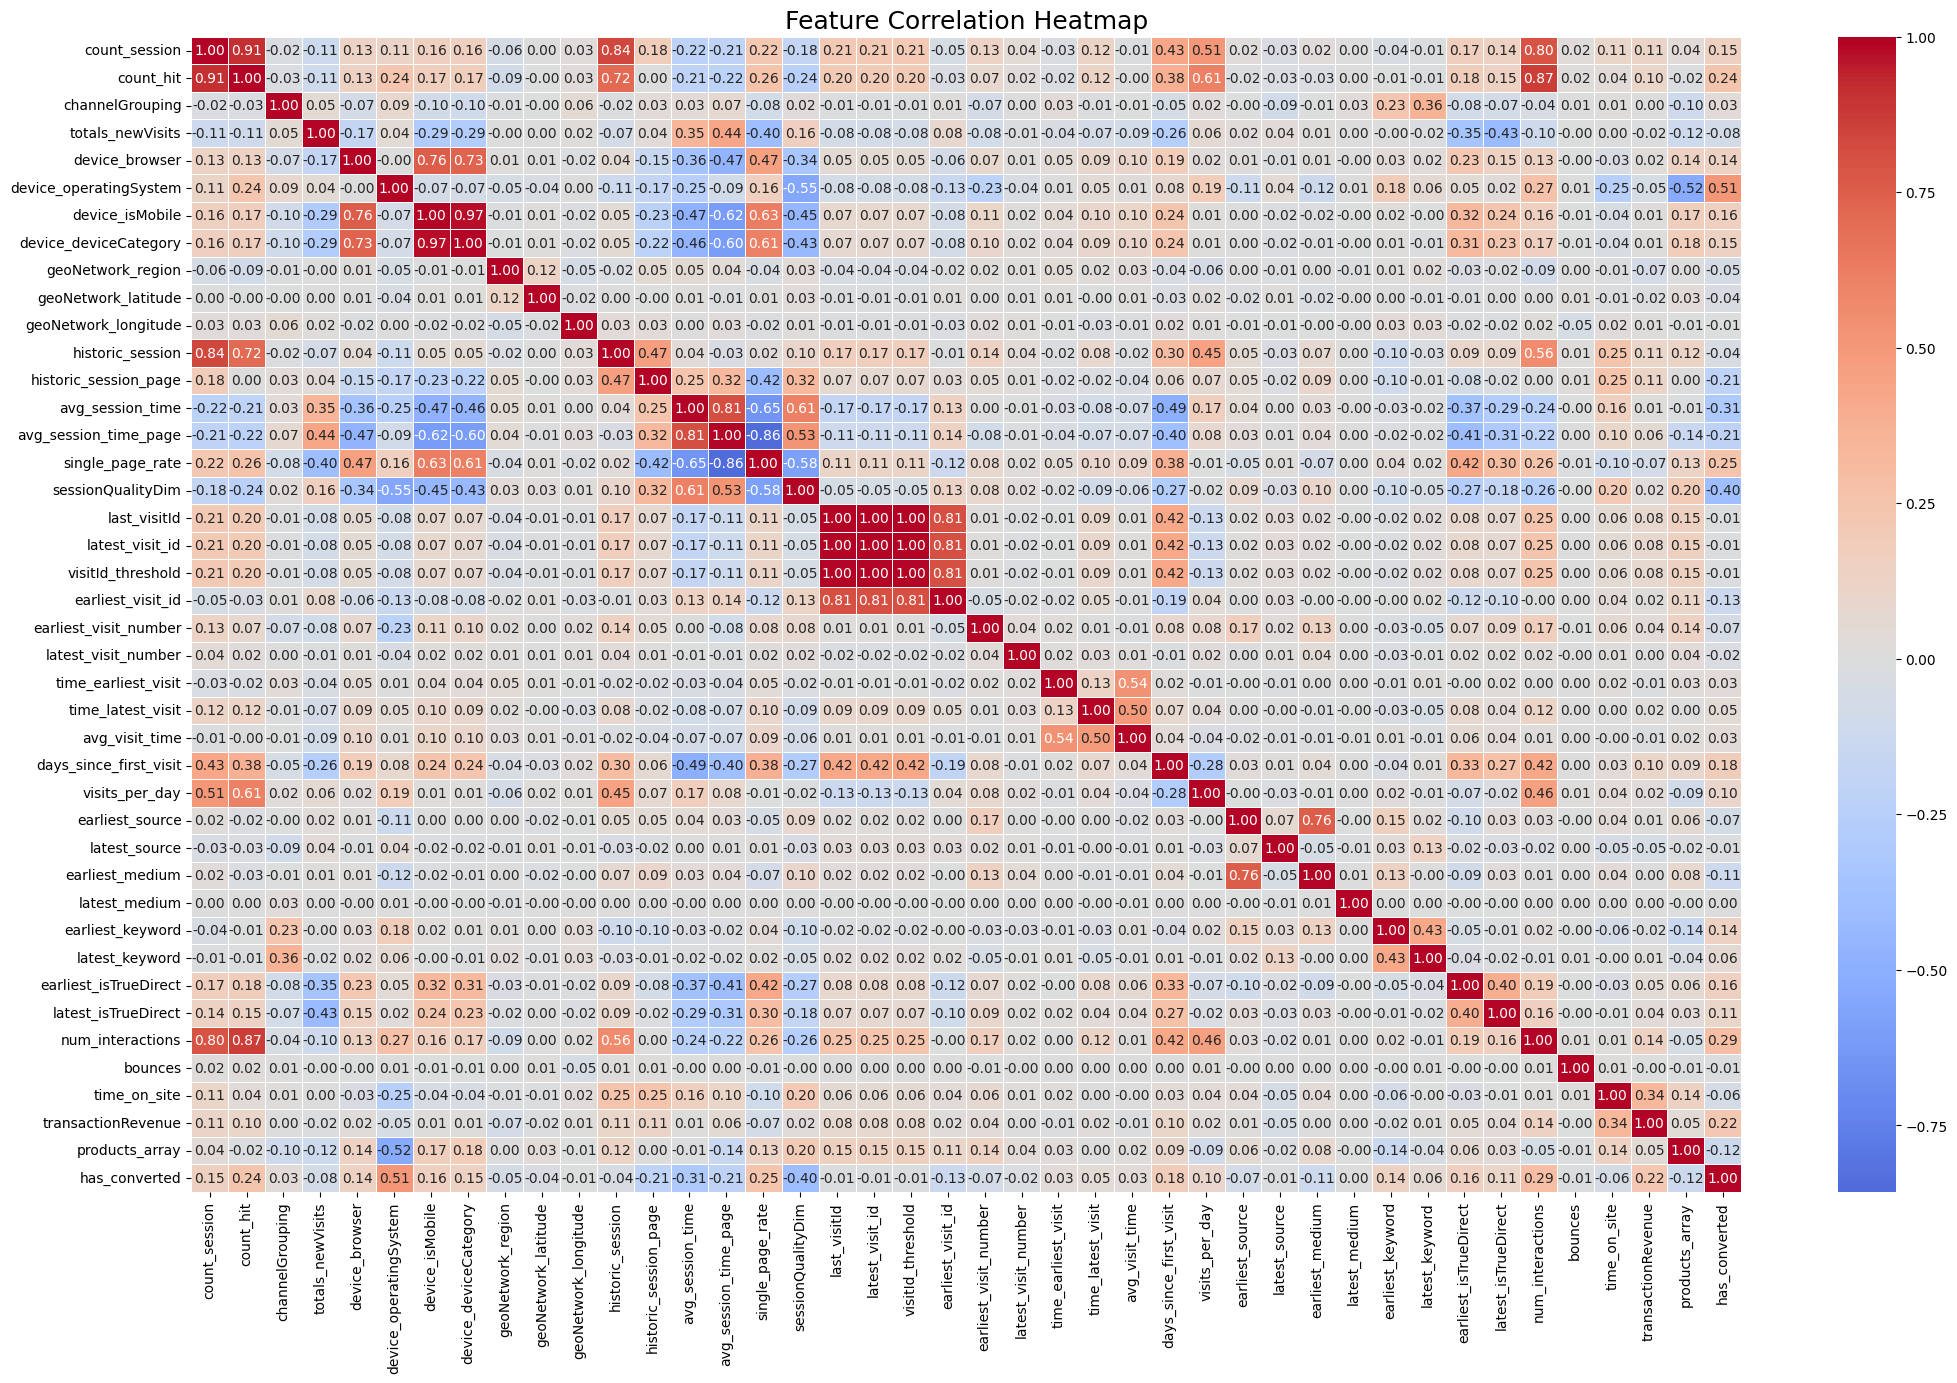

In [17]:
# Checking the Correlation using heatmap

plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.show()

In [18]:
final_df = pd.read_csv(r"Guvi_Final_Project_Numeric_Dataset.csv")
final_df

count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194                0                 0   
1                  9       1194                0                 0   
2                 28       1816                2                 0   
3                  2        299                2                 0   
4                  2        299                2                 0   
...              ...        ...              ...               ...   
99995             58      12340                2                 0   
99996             58      12340                2                 0   
99997             58      12340                2                 0   
99998             58      12340                2                 0   
99999             58      12340                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
1                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
4                   5                       1                1   
...               ...                     ...              ...   
99995               5                       6                1   
99996               5                       6                1   
99997               5                       6                1   
99998               5                       6                1   
99999               5                       6                1   

       device_deviceCategory  geoNetwork_region  geoNetwork_latitude  ...  \
0                          1                 71              25.3463  ...   
1                          1                 71              25.3463  ...   
2                          1                  2              25.4052  ...   
3                          1                  1              24.4539  ...   
4                          1                  1              24.4539  ...   
...                      ...                ...                  ...  ...   
99995                      1                 25              25.2048  ...   
99996                      1                 25              25.2048  ...   
99997                      1                 25              25.2048  ...   
99998                      1                 25              25.2048  ...   
99999                      1                 25              25.2048  ...   

       earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                     3               2                      1   
1                     3               2                      1   
2                     3               1                      1   
3                    89              96                      1   
4                    89              96                      1   
...                 ...             ...                    ...   
99995                89              96                      1   
99996                89              96                      1   
99997                89              96                      1   
99998                89              96                      1   
99999                89              96                      1   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                        1              1900        0          5617   
1                        1              1900        0          5617   
2                        1              3843        0         77417   
3                        1               592        0          1576   
4                        1               592        0          1576   
...                    ...               ...      ...           ...   
99995                    1             34999        0             0   
99996                    1             34999        0             0   
99997           

In [19]:
final_df.nunique()

count_session              157
count_hit                 4506
channelGrouping              3
totals_newVisits             2
device_browser               9
device_operatingSystem       7
device_isMobile              2
device_deviceCategory        3
geoNetwork_region           91
geoNetwork_latitude        104
geoNetwork_longitude       104
historic_session          6979
historic_session_page     3066
avg_session_time          8279
avg_session_time_page     3698
single_page_rate           493
sessionQualityDim           67
last_visitId              9093
latest_visit_id           9093
visitId_threshold         9093
earliest_visit_id         9160
earliest_visit_number      528
latest_visit_number        694
time_earliest_visit       1360
time_latest_visit         1356
avg_visit_time              24
days_since_first_visit      31
visits_per_day            7794
earliest_source             36
latest_source                7
earliest_medium             18
latest_medium                2
earliest

## 9000 rows shows as duplicate, so dont delete the duplicated rows

In [230]:
# # checking the duplicate values
# final_df.duplicated().sum()

In [231]:
# We found totall 90793 duplicate columns so we need to drop from the origibal dataset frame

# final_df_1= final_df.drop_duplicates()
# final_df_1.reset_index(drop= True, inplace= True)

In [232]:
# final_df_1.duplicated().sum()

### The some the column does not contain any correlation between the one to another columns, I will remove the columns from the Dataframe.

In [20]:
correlation_threshold = 0.05  # Set a threshold (e.g., 0.05 means very weak correlation)

correlation_values = final_df.corr()['has_converted'].abs().sort_values()
correlation_values # Display correlation values

latest_medium             0.004629
geoNetwork_longitude      0.006820
last_visitId              0.009604
visitId_threshold         0.009604
latest_visit_id           0.009604
bounces                   0.011276
latest_source             0.012401
latest_visit_number       0.022923
avg_visit_time            0.030875
time_earliest_visit       0.031189
channelGrouping           0.033256
geoNetwork_latitude       0.035654
historic_session          0.040548
time_latest_visit         0.047533
geoNetwork_region         0.054603
time_on_site              0.058480
latest_keyword            0.060759
earliest_visit_number     0.069179
earliest_source           0.074351
totals_newVisits          0.080474
visits_per_day            0.097742
latest_isTrueDirect       0.105705
earliest_medium           0.113826
products_array            0.119706
earliest_visit_id         0.126162
device_browser            0.139091
earliest_keyword          0.141791
device_deviceCategory     0.147006
count_session       

In [21]:
low_corr_features = correlation_values[correlation_values < correlation_threshold].index
final_df_1 = final_df.drop(columns=low_corr_features)

In [22]:
final_df_1

count_session  count_hit  totals_newVisits  device_browser  \
0                  9       1194                 0               5   
1                  9       1194                 0               5   
2                 28       1816                 0               5   
3                  2        299                 0               5   
4                  2        299                 0               5   
...              ...        ...               ...             ...   
99995             58      12340                 0               5   
99996             58      12340                 0               5   
99997             58      12340                 0               5   
99998             58      12340                 0               5   
99999             58      12340                 0               5   

       device_operatingSystem  device_isMobile  device_deviceCategory  \
0                           1                1                      1   
1                           1                1                      1   
2                           1                1                      1   
3                           1                1                      1   
4                           1                1                      1   
...                       ...              ...                    ...   
99995                       6                1                      1   
99996                       6                1                      1   
99997                       6                1                      1   
99998                       6                1                      1   
99999                       6                1                      1   

       geoNetwork_region  historic_session_page  avg_session_time  ...  \
0                     71                   1254        722.666667  ...   
1                     71                   1254        722.666667  ...   
2                      2                   4963        445.214286  ...   
3                      1                      0        787.500000  ...   
4                      1                      0        787.500000  ...   
...                  ...                    ...               ...  ...   
99995                 25                      0        484.172414  ...   
99996                 25                      0        484.172414  ...   
99997                 25                      0        484.172414  ...   
99998                 25                      0        484.172414  ...   
99999                 25                      0        484.172414  ...   

       earliest_medium  earliest_keyword  latest_keyword  \
0                    3                 3               2   
1                    3                 3               2   
2                    0                 3               1   
3                    7                89              96   
4                    7                89              96   
...                ...               ...             ...   
99995                7                89              96   
99996                7                89              96   
99997                7                89              96   
99998                7                89              96   
99999                7                89              96   

       earliest_isTrueDirect  latest_isTrueDirect  num_interactions  \
0                          1                    1              1900   
1                          1                    1              1900   
2                          1                    1              3843   
3                          1                    1               592   
4                          1                    1               592   
...                      ...                  ...               ...   
99995                      1                    1             34999   
99996                      1                    1             34999   
99997                      1                    1   

### Verify the skewness between the data

In [23]:
# detecting the skewed columns using plot
def plot(final_df_1,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [24]:
final_df_1.columns

Index(['count_session', 'count_hit', 'totals_newVisits', 'device_browser',
       'device_operatingSystem', 'device_isMobile', 'device_deviceCategory',
       'geoNetwork_region', 'historic_session_page', 'avg_session_time',
       'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
       'earliest_visit_id', 'earliest_visit_number', 'days_since_first_visit',
       'visits_per_day', 'earliest_source', 'earliest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted'],
      dtype='object')

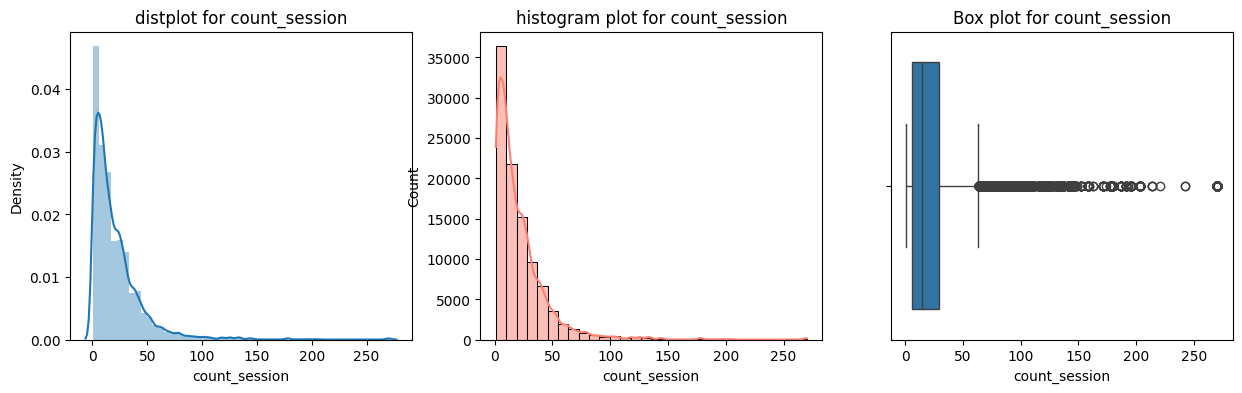

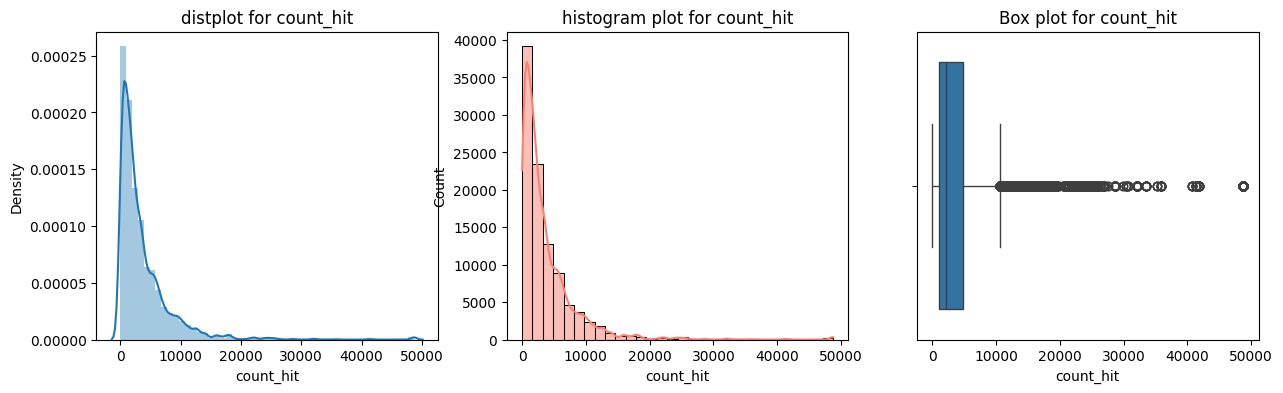

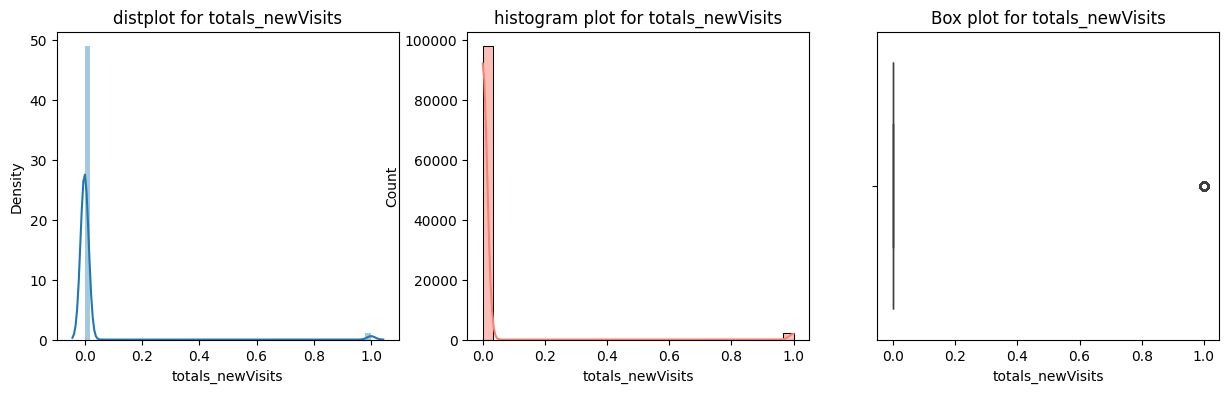

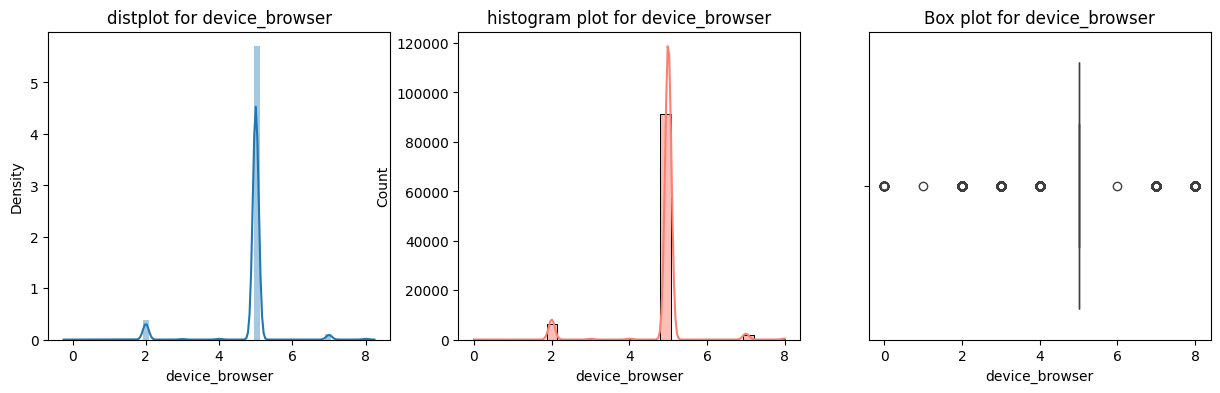

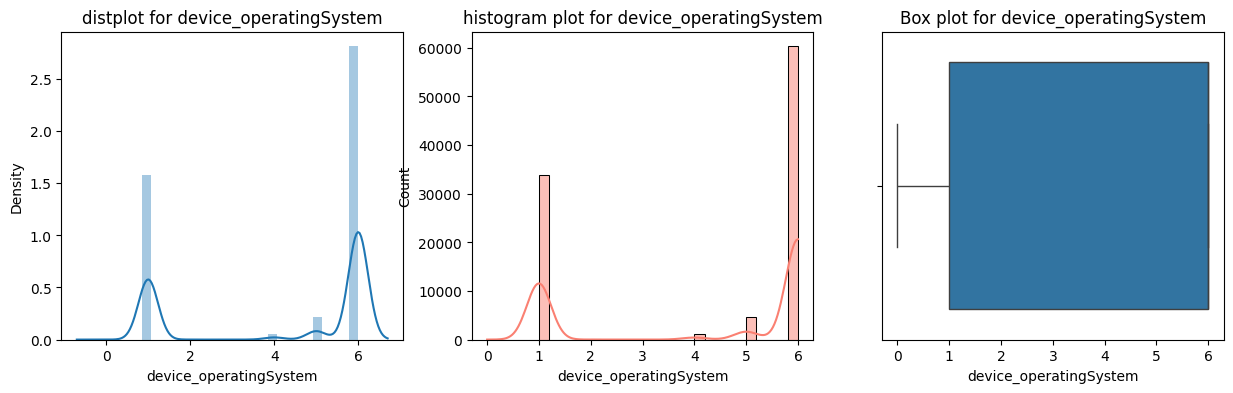

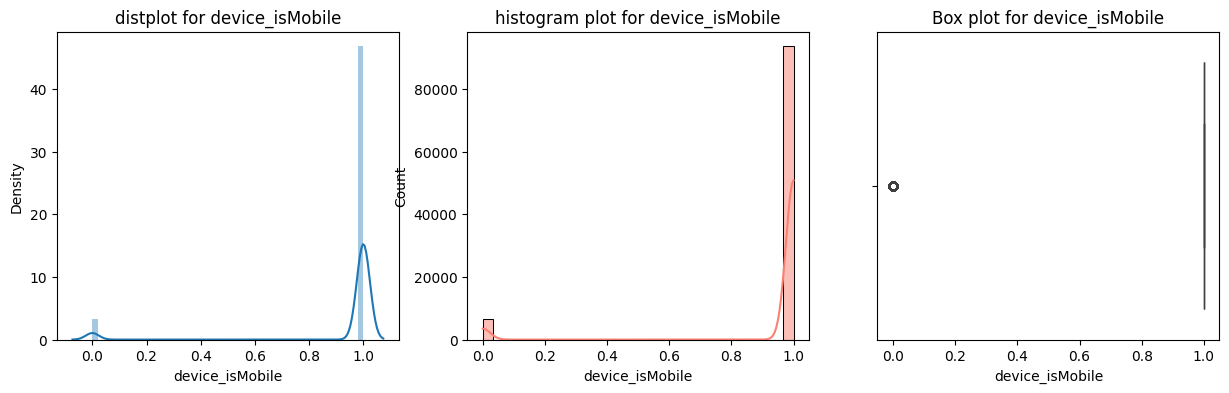

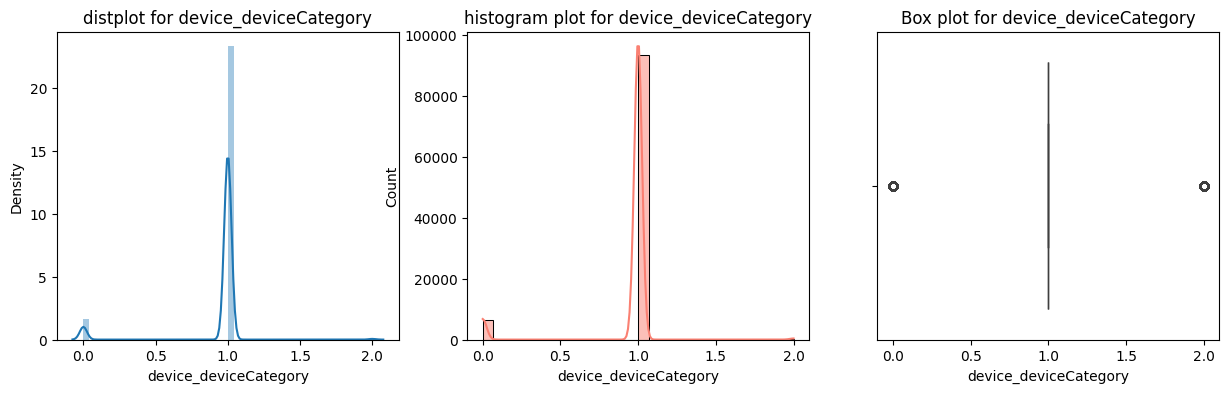

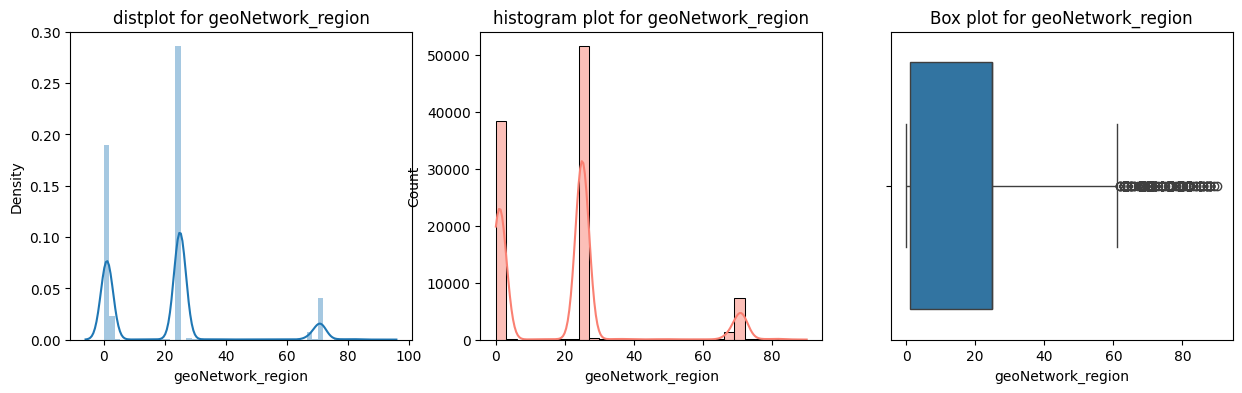

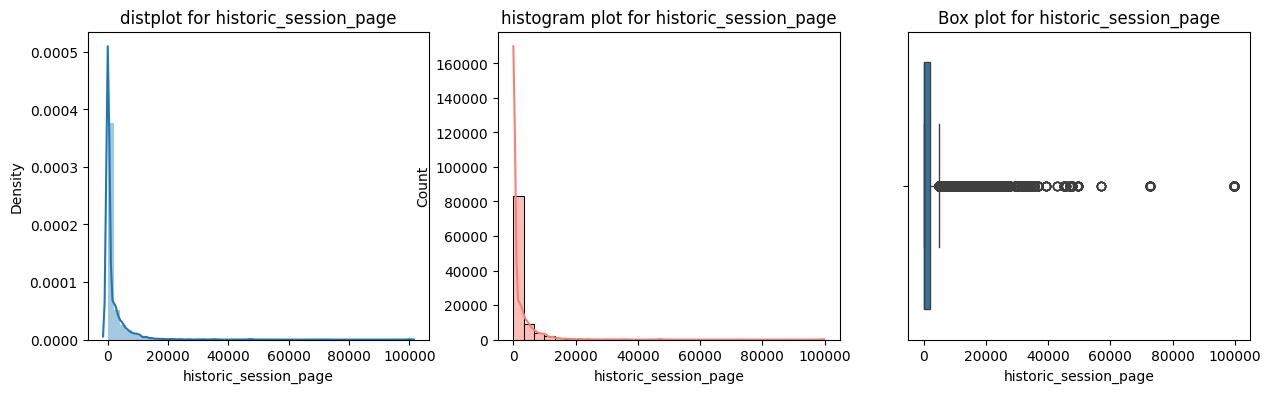

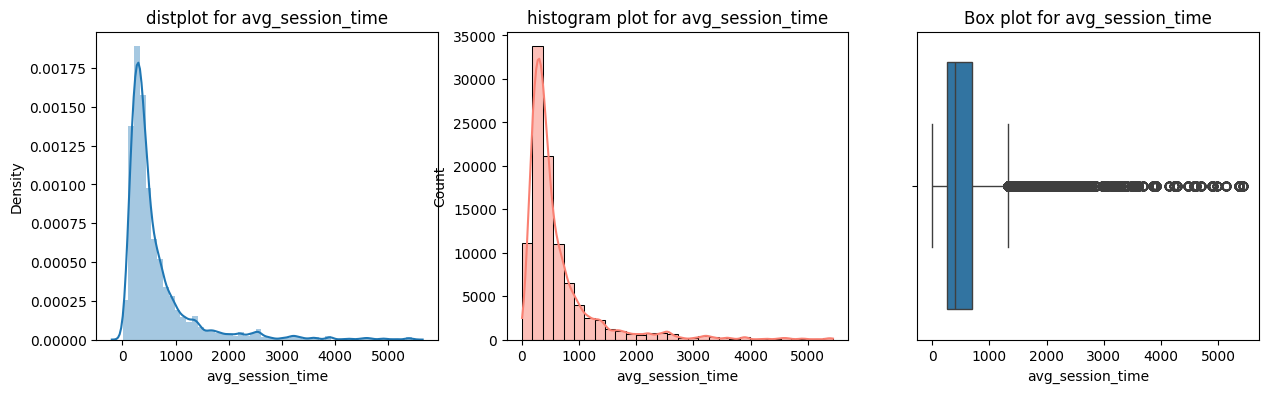

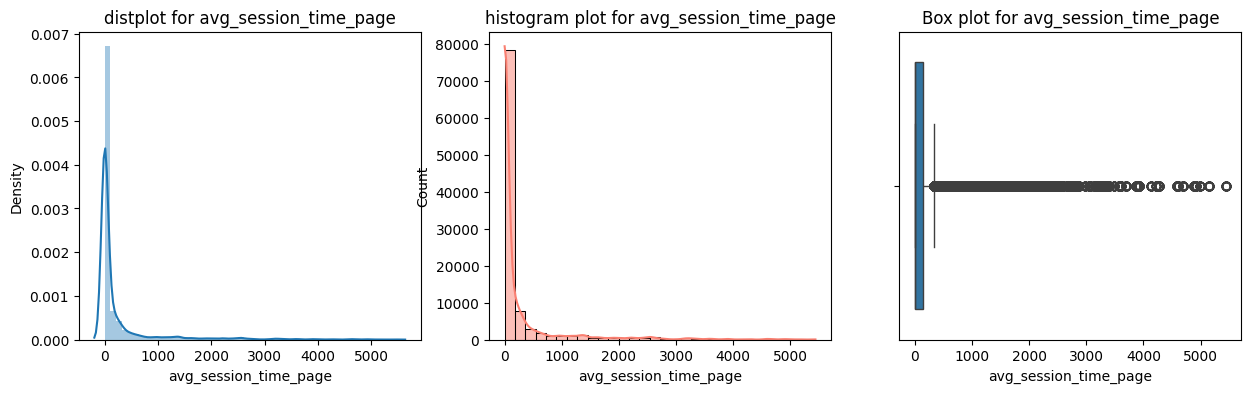

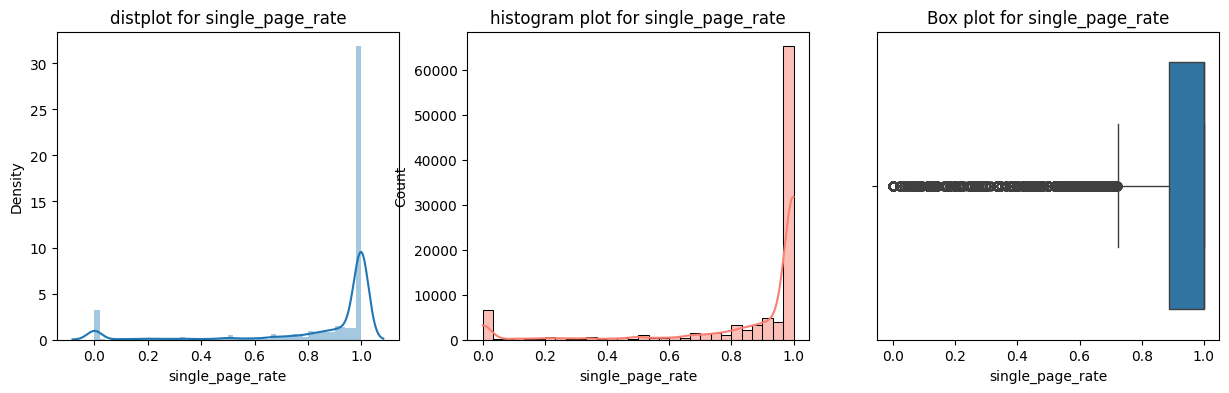

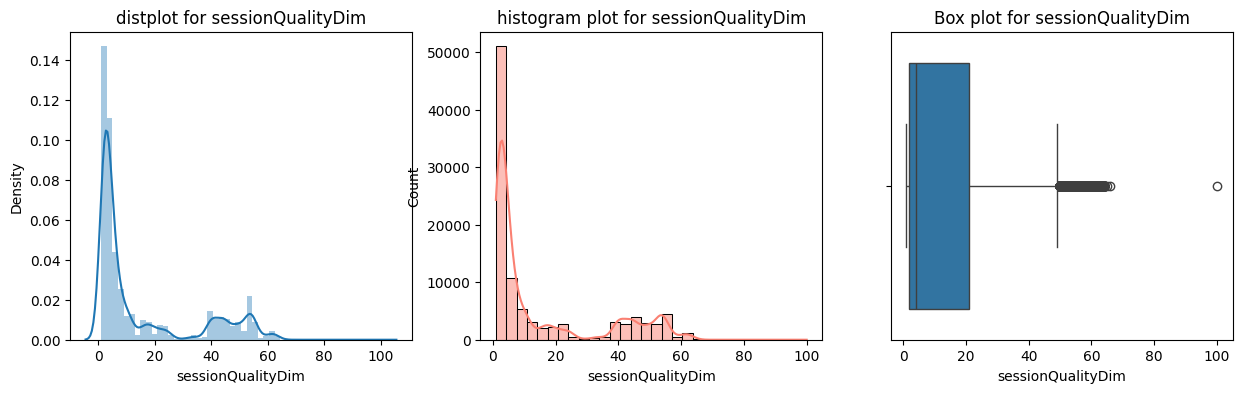

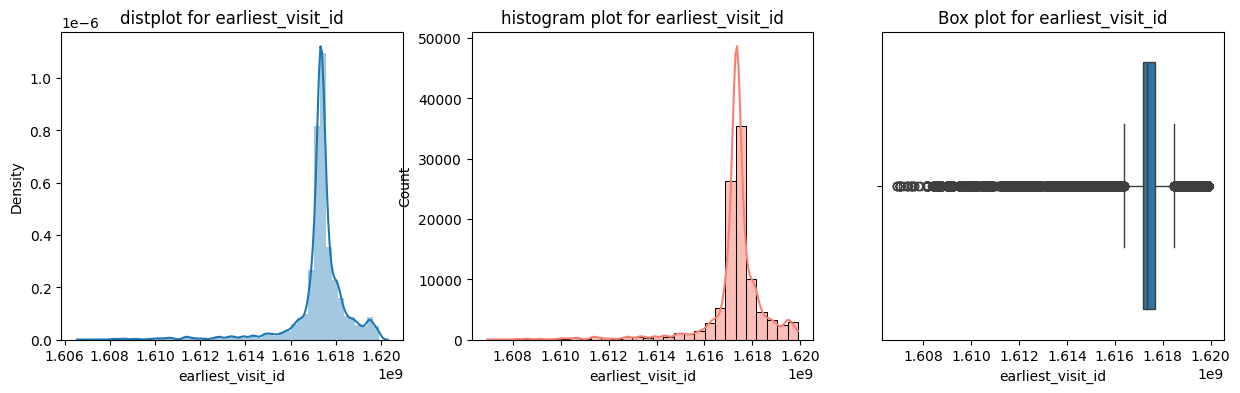

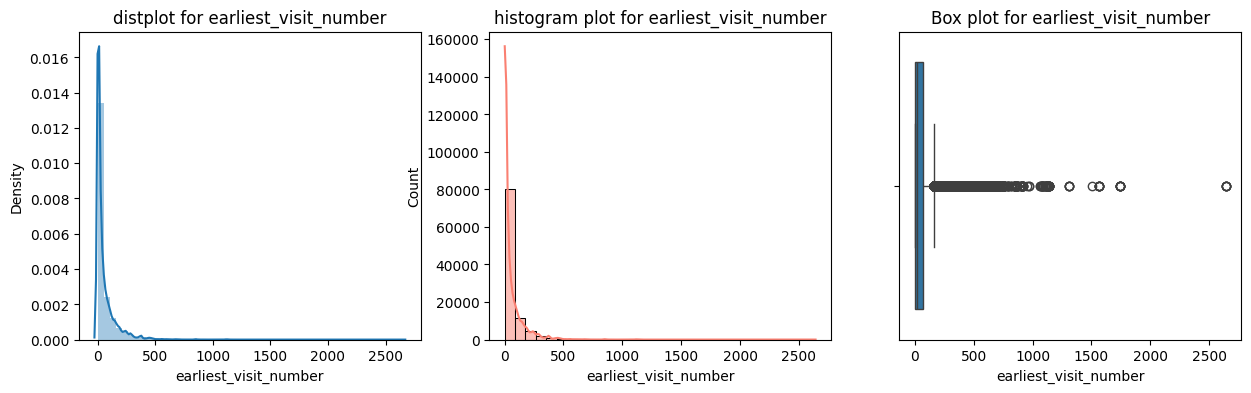

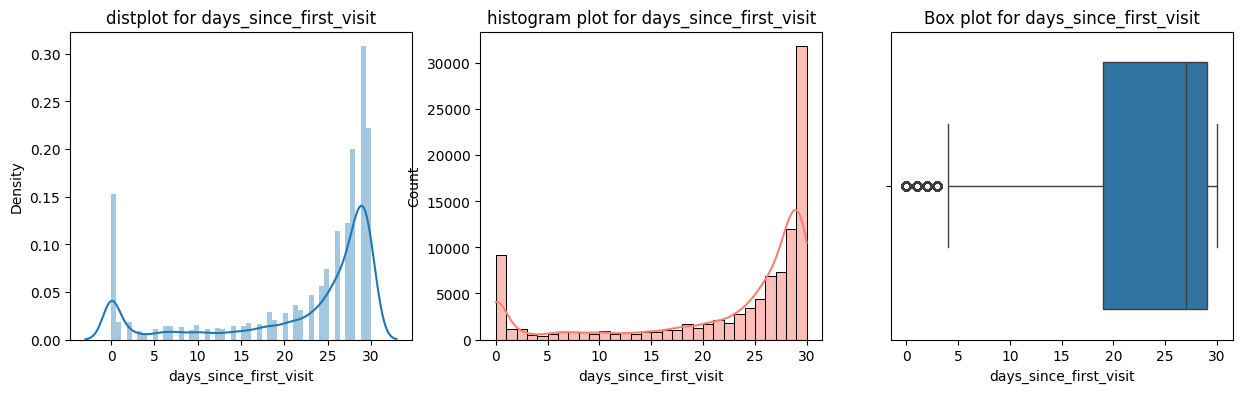

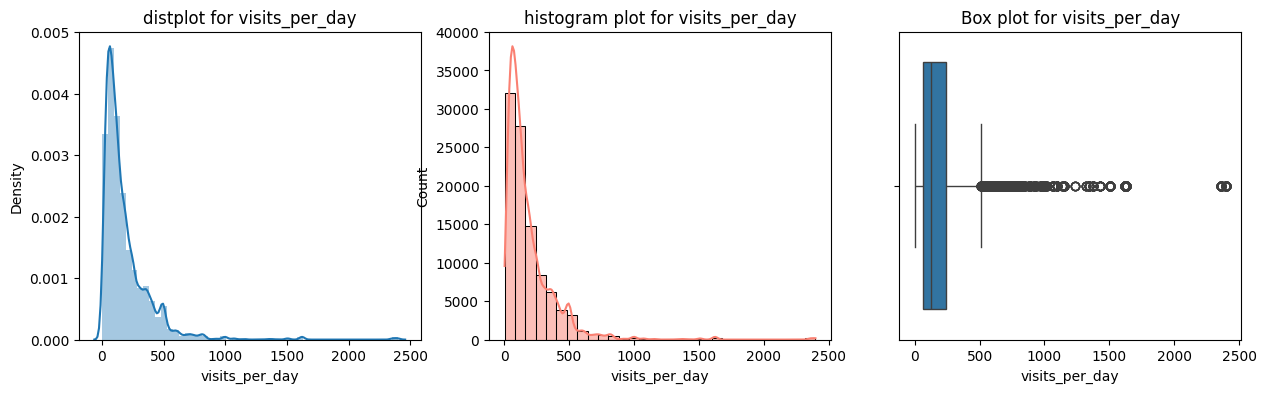

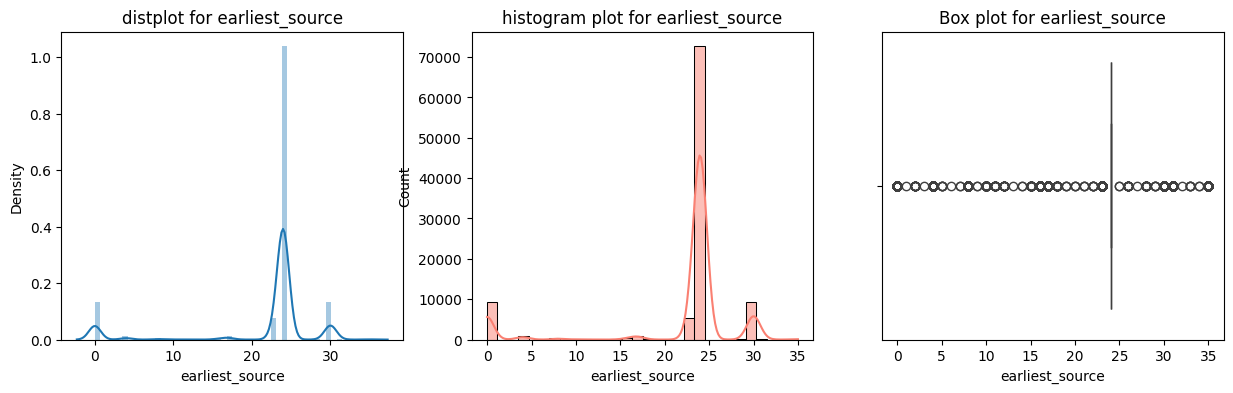

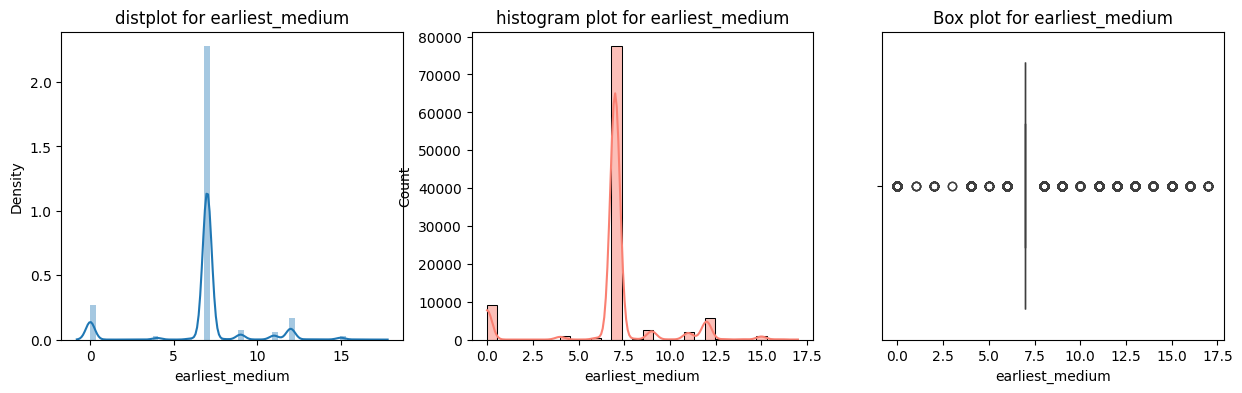

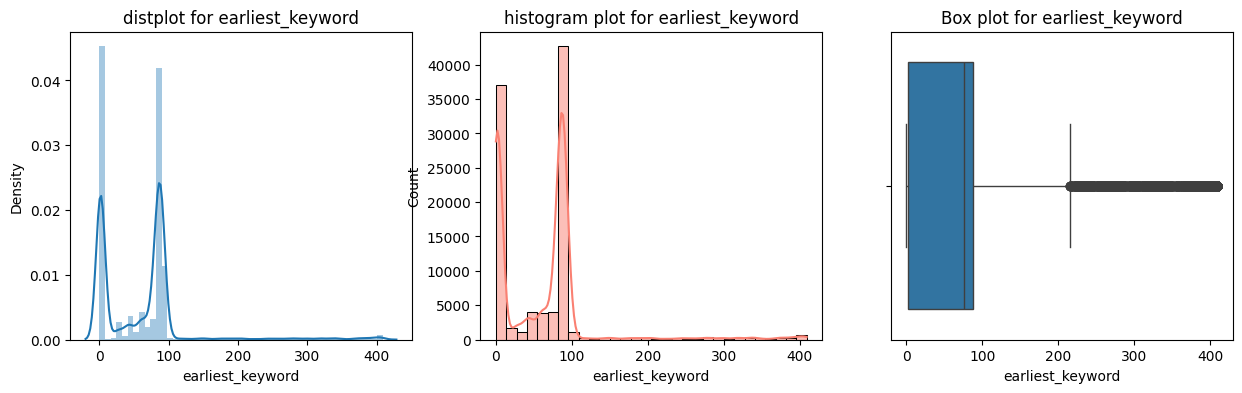

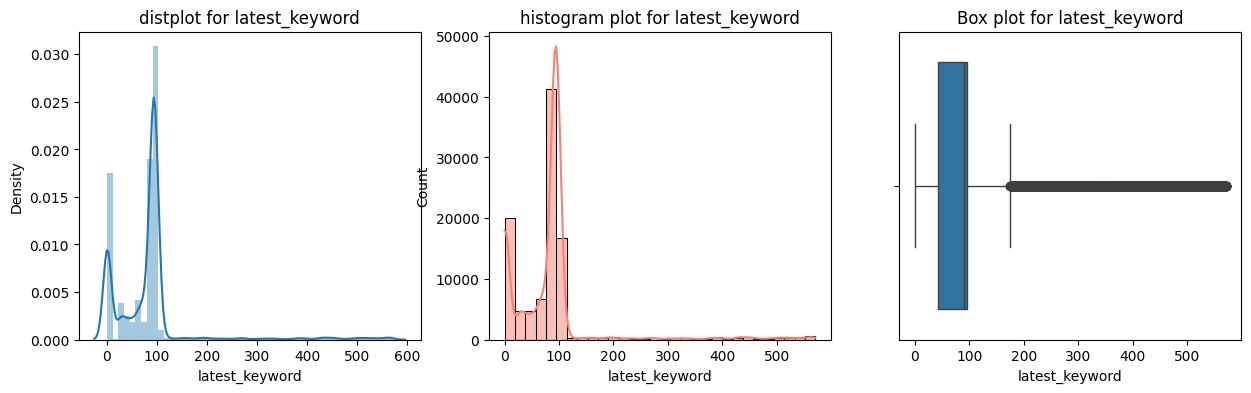

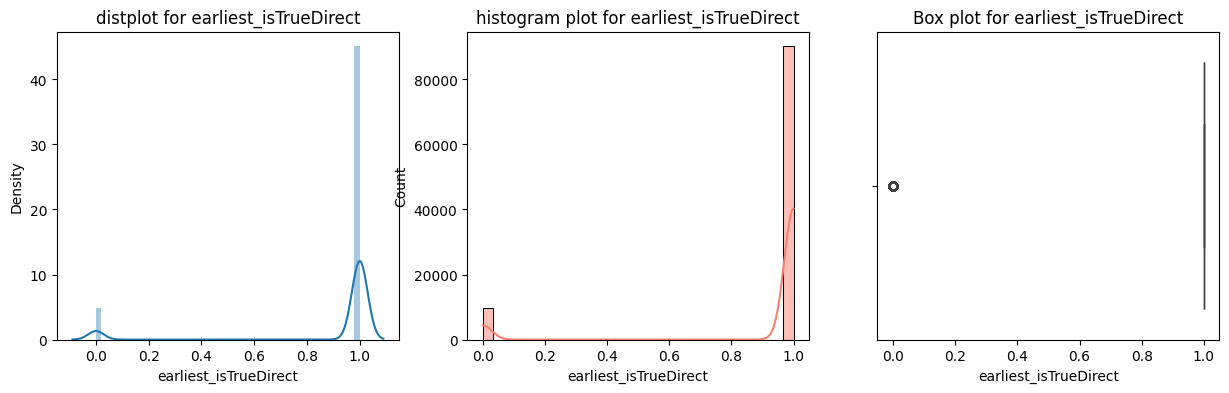

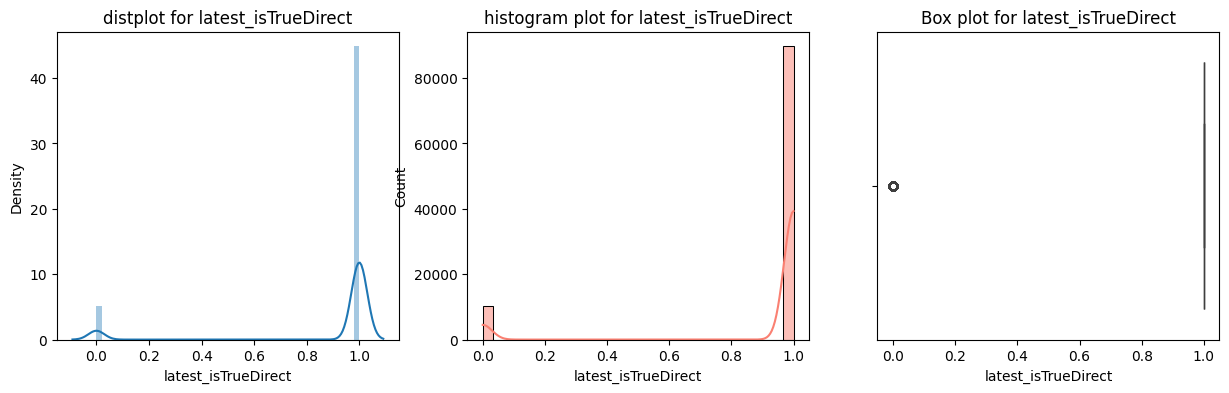

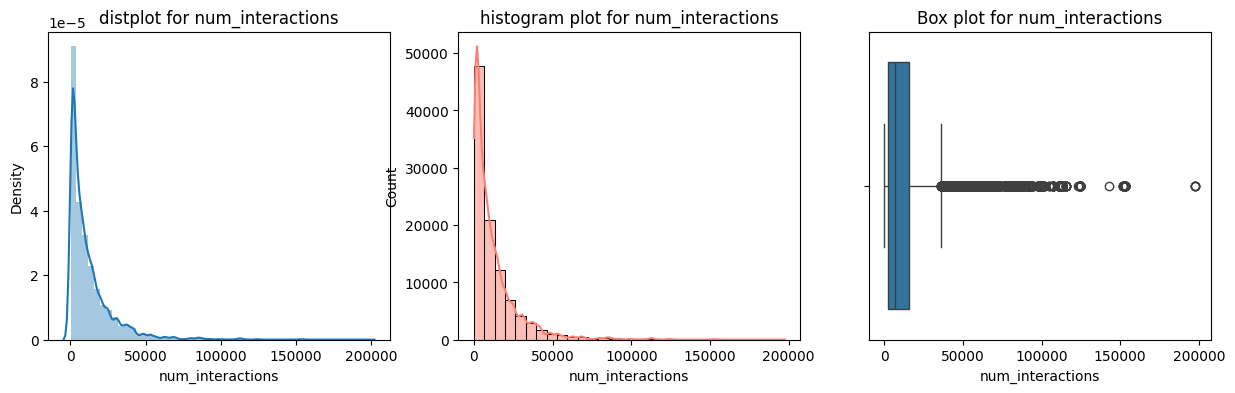

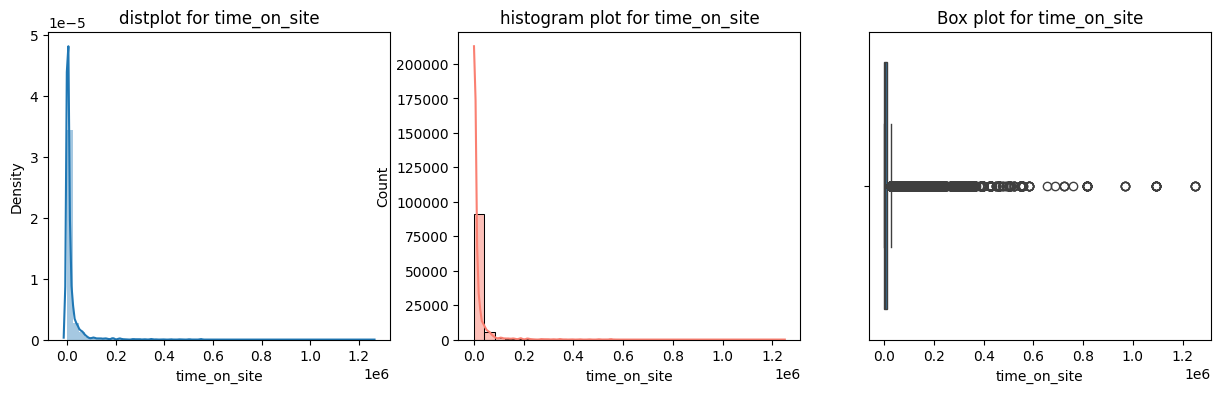

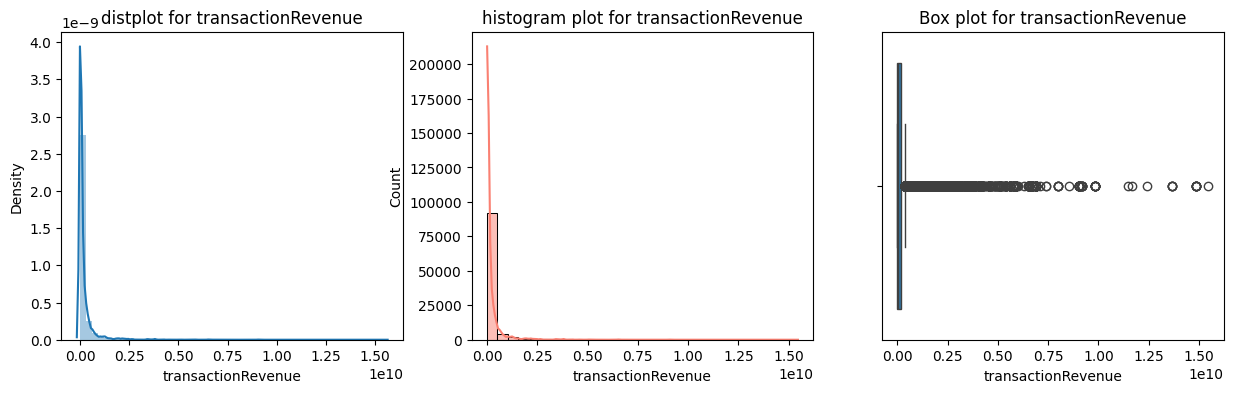

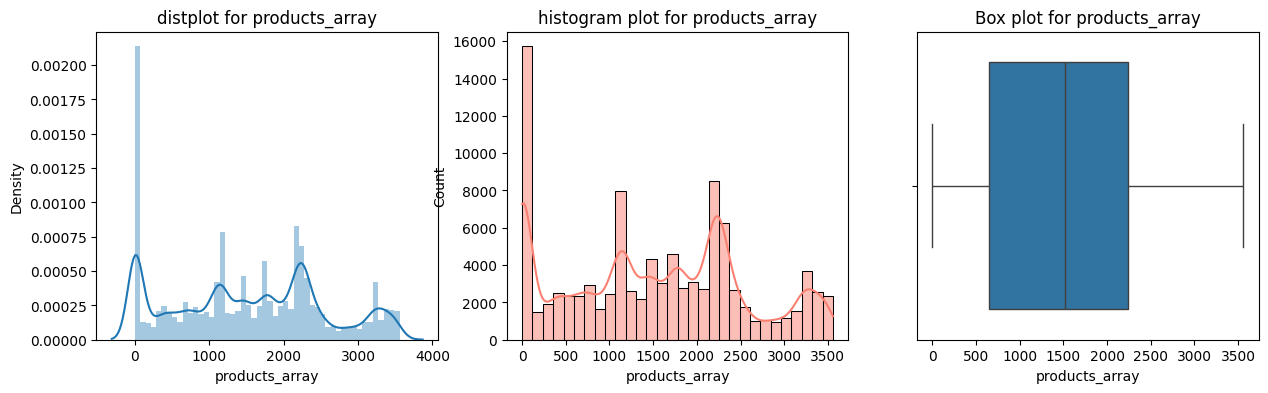

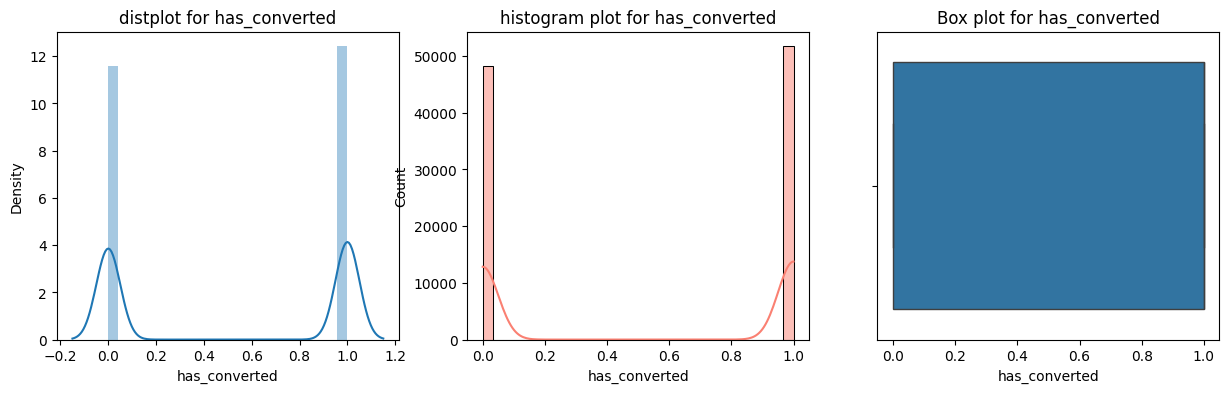

In [25]:
for i in final_df_1.columns:
    plot(final_df_1,i)

In [26]:
final_df_1.describe().T

count          mean           std           min  \
count_session           100000.0  2.153244e+01  2.400239e+01  1.000000e+00   
count_hit               100000.0  3.671723e+03  4.627339e+03  2.000000e+00   
totals_newVisits        100000.0  2.038000e-02  1.412970e-01  0.000000e+00   
device_browser          100000.0  4.851230e+00  8.039054e-01  0.000000e+00   
device_operatingSystem  100000.0  4.240320e+00  2.332004e+00  0.000000e+00   
device_isMobile         100000.0  9.358600e-01  2.450034e-01  0.000000e+00   
device_deviceCategory   100000.0  9.392700e-01  2.527103e-01  0.000000e+00   
geoNetwork_region       100000.0  2.003730e+01  1.969368e+01  0.000000e+00   
historic_session_page   100000.0  1.875326e+03  5.222528e+03  0.000000e+00   
avg_session_time        100000.0  6.170504e+02  6.704941e+02  2.000000e+00   
avg_session_time_page   100000.0  2.377027e+02  6.428773e+02  0.000000e+00   
single_page_rate        100000.0  8.681554e-01  2.746652e-01  0.000000e+00   
sessionQualityDim       100000.0  1.498554e+01  1.858126e+01  1.000000e+00   
earliest_visit_id       100000.0  1.617289e+09  1.310485e+06  1.606934e+09   
earliest_visit_number   100000.0  5.580513e+01  9.740128e+01  1.000000e+00   
days_since_first_visit  100000.0  2.202890e+01  9.814491e+00  0.000000e+00   
visits_per_day          100000.0  1.889594e+02  2.066670e+02  9.230769e-01   
earliest_source         100000.0  2.195465e+01  7.642196e+00  0.000000e+00   
earliest_medium         100000.0  6.848010e+00  2.692754e+00  0.000000e+00   
earliest_keyword        100000.0  5.999395e+01  6.545224e+01  0.000000e+00   
latest_keyword          100000.0  8.325869e+01  8.394203e+01  0.000000e+00   
earliest_isTrueDirect   100000.0  9.019600e-01  2.973702e-01  0.000000e+00   
latest_isTrueDirect     100000.0  8.973200e-01  3.035420e-01  0.000000e+00   
num_interactions        100000.0  1.213933e+04  1.510693e+04  2.000000e+01   
time_on_site            100000.0  1.588642e+04  4.796398e+04  0.000000e+00   
transactionRevenue      100000.0  1.945557e+08  5.557385e+08  0.000000e+00   
products_array          100000.0  1.516460e+03  1.035809e+03  0.000000e+00   
has_converted           100000.0  5.172700e-01  4.997042e-01  0.000000e+00   

                                 25%           50%           75%           max  
count_session           6.000000e+00  1.500000e+01  2.900000e+01  2.700000e+02  
count_hit               9.710000e+02  2.209000e+03  4.812000e+03  4.874400e+04  
totals_newVisits        0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
device_browser          5.000000e+00  5.000000e+00  5.000000e+00  8.000000e+00  
device_operatingSystem  1.000000e+00  6.000000e+00  6.000000e+00  6.000000e+00  
device_isMobile         1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
device_deviceCategory   1.000000e+00  1.000000e+00  1.000000e+00  2.000000e+00  
geoNetwork_region       1.000000e+00  2.500000e+01  2.500000e+01  9.000000e+01  
historic_session_page   0.000000e+00  0.000000e+00  1.985000e+03  9.989600e+04  
avg_session_time        2.640968e+02  3.965463e+02  6.868750e+02  5.441000e+03  
avg_session_time_page   0.000000e+00  0.000000e+00  1.344375e+02  5.441000e+03  
single_page_rate        8.888889e-01  1.000000e+00  1.000000e+00  1.000000e+00  
sessionQualityDim       2.000000e+00  4.000000e+00  2.100000e+01  1.000000e+02  
earliest_visit_id       1.617169e+09  1.617360e+09  1.617697e+09  1.619899e+09  
earliest_visit_number   3.000000e+00  1.800000e+01  6.700000e+01  2.642000e+03  
days_since_first_visit  1.900000e+01  2.700000e+01  2.900000e+01  3.000000e+01  
visits_per_day          6.650000e+01  1.261786e+02  2.436071e+02  2.397333e+03  
earliest_source         2.400000e+01  2.400000e+01  2.400000e+01  3.500000e+01  
earliest_medium         7.000000e+00  7.000000e+00  7.000000e+00  1.700000e+01  
earliest_keyword        3.000000e+00  7.600000e+01  8.800000e+01  4.090000e+02  
latest_keyword          4.200000e+01  9.100000e+01  9.500000e+0

In [27]:
final_df_2= final_df_1.copy()

In [30]:
final_df_2.columns

Index(['count_session', 'count_hit', 'totals_newVisits', 'device_browser',
       'device_operatingSystem', 'device_isMobile', 'device_deviceCategory',
       'geoNetwork_region', 'historic_session_page', 'avg_session_time',
       'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
       'earliest_visit_id', 'earliest_visit_number', 'days_since_first_visit',
       'visits_per_day', 'earliest_source', 'earliest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted'],
      dtype='object')

## skewness handling

In [ ]:
# The Skewness Columns are
# 1.count_session    2.count_hit    3.historic_session_page 4.avg_session_time    5.avg_session_time_page
# 6.single_page_rate      7.earliest_visit_id     8.earliest_visit_number     9.visits_per_day    10.bounce_rate
# 11.earliest_keyword   12.latest_keyword   13.num_interactions     14.time_on_site     15.transactionRevenue

In [32]:
log_columns = ["count_session", "count_hit", "historic_session_page", "avg_session_time", "avg_session_time_page", "single_page_rate",
               "earliest_visit_id", "earliest_visit_number", "visits_per_day", "earliest_keyword", "latest_keyword",
               "num_interactions", "time_on_site", "transactionRevenue"]

# Apply log1p transformation to avoid log(0) errors
final_df_2[log_columns] = final_df_2[log_columns].apply(lambda x: np.log1p(x))

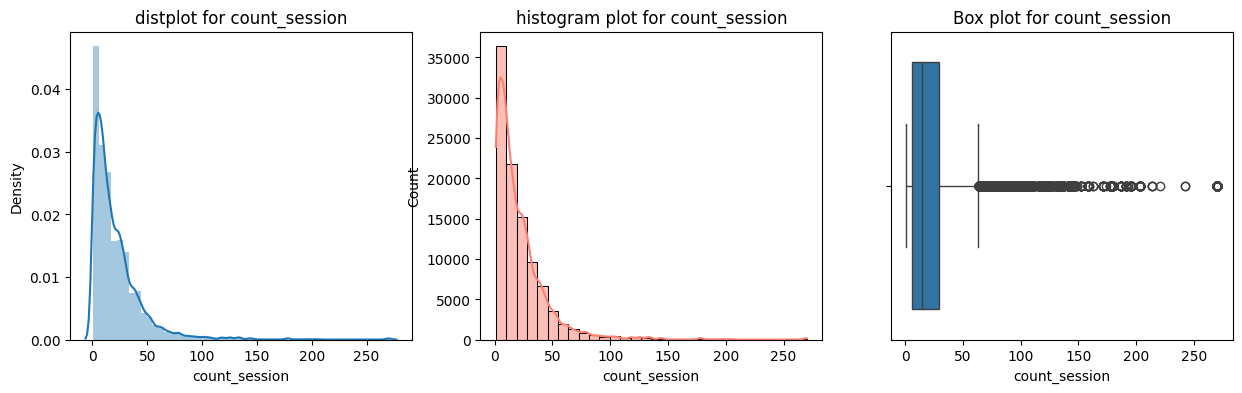

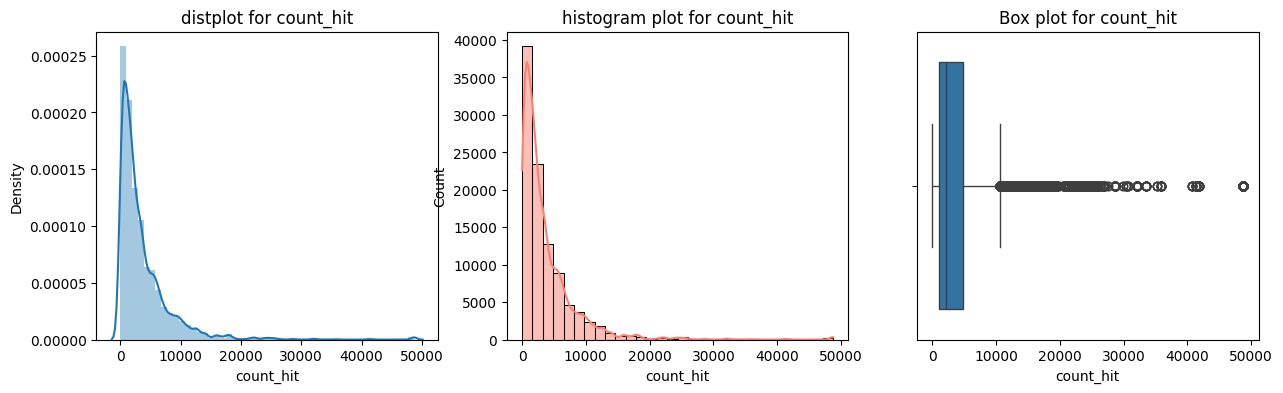

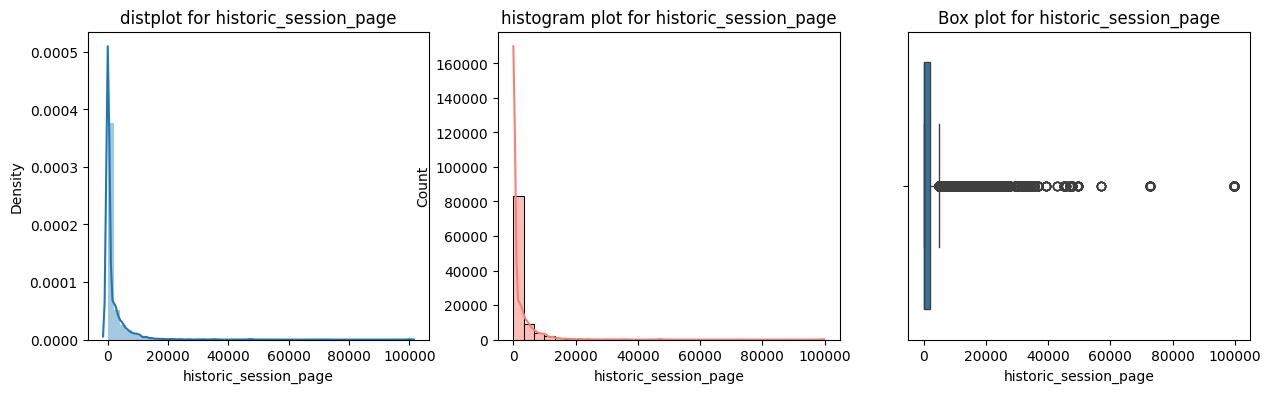

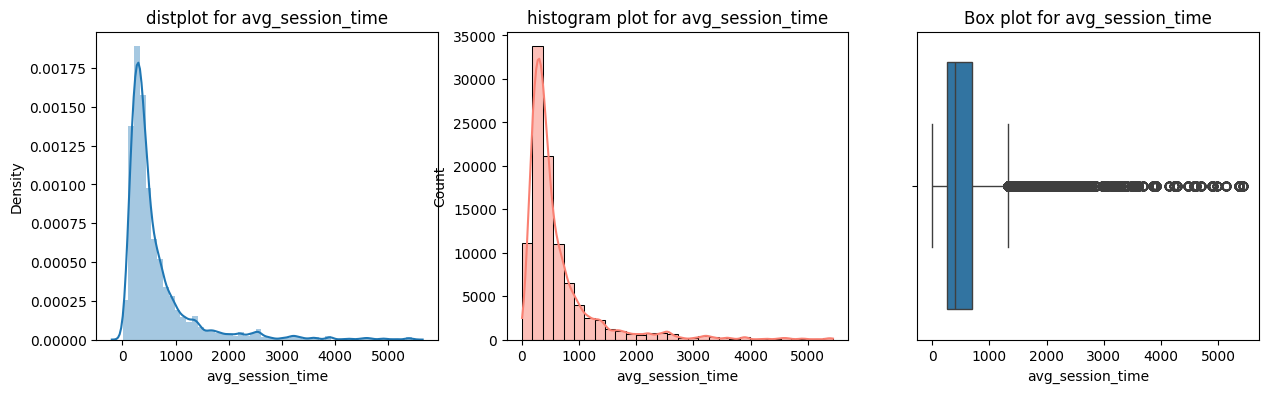

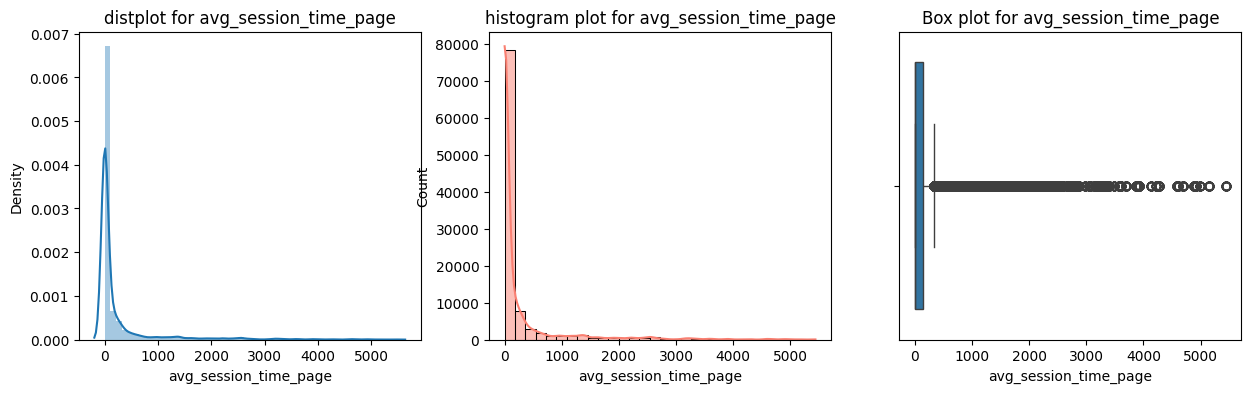

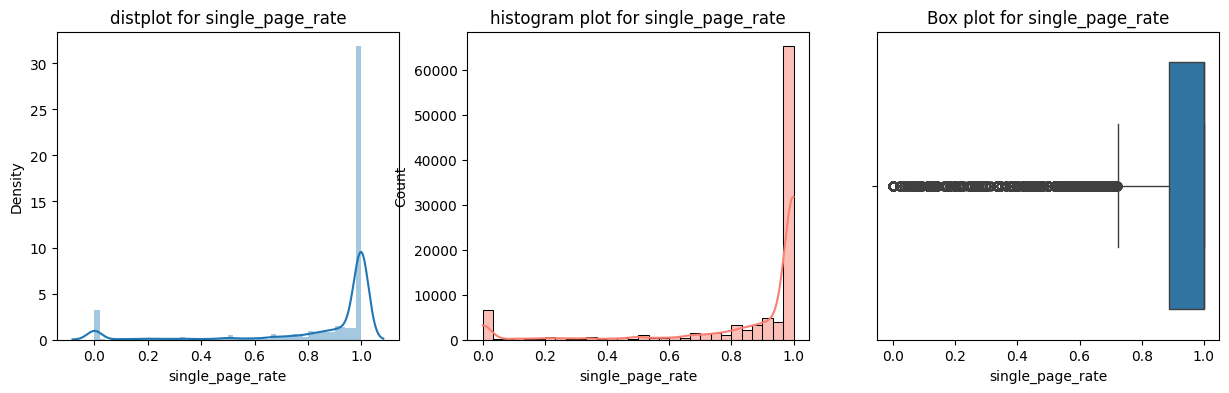

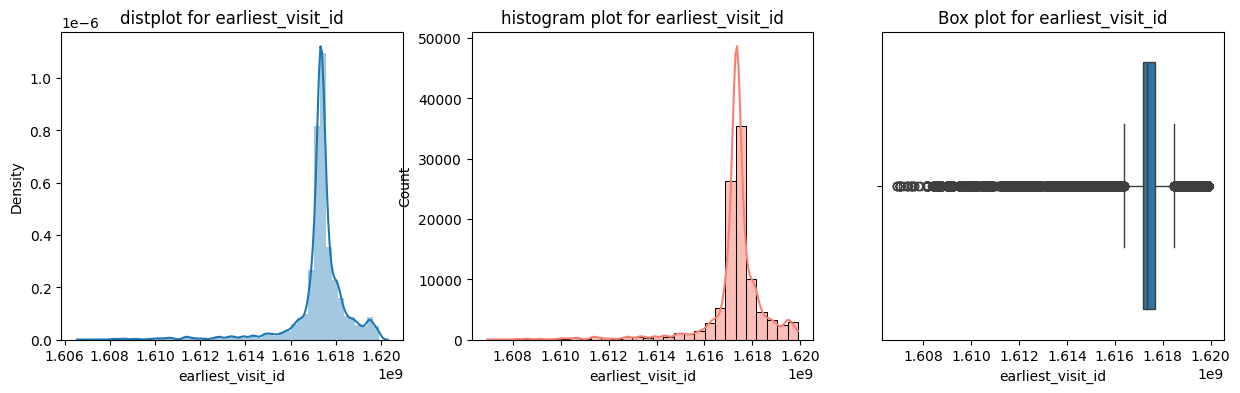

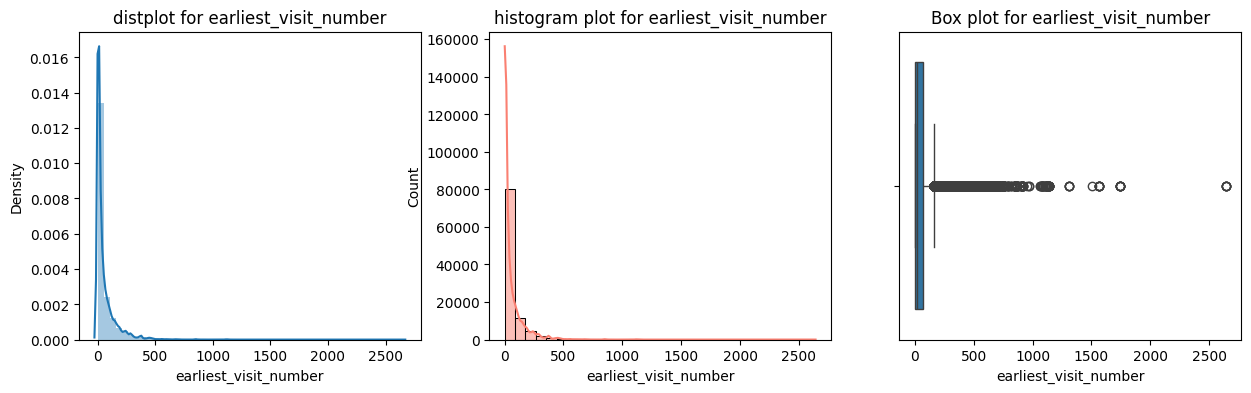

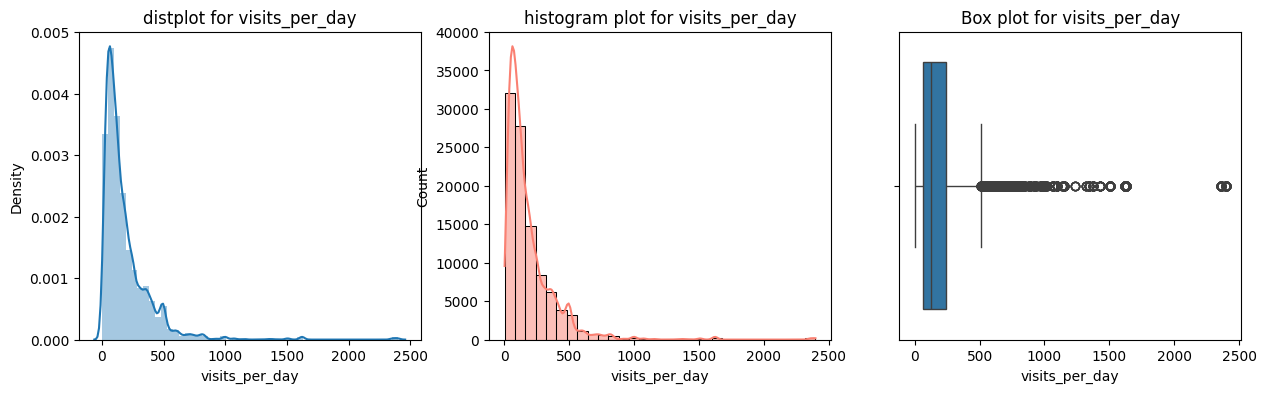

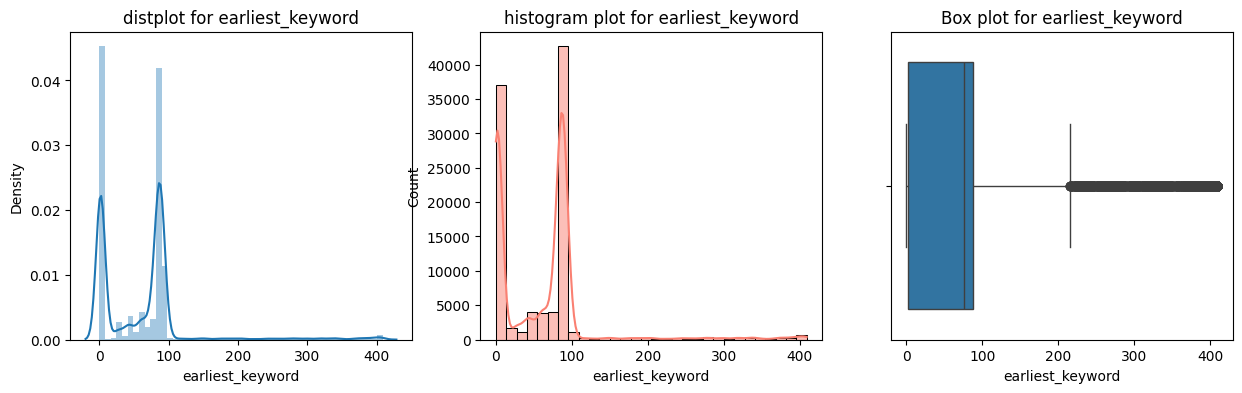

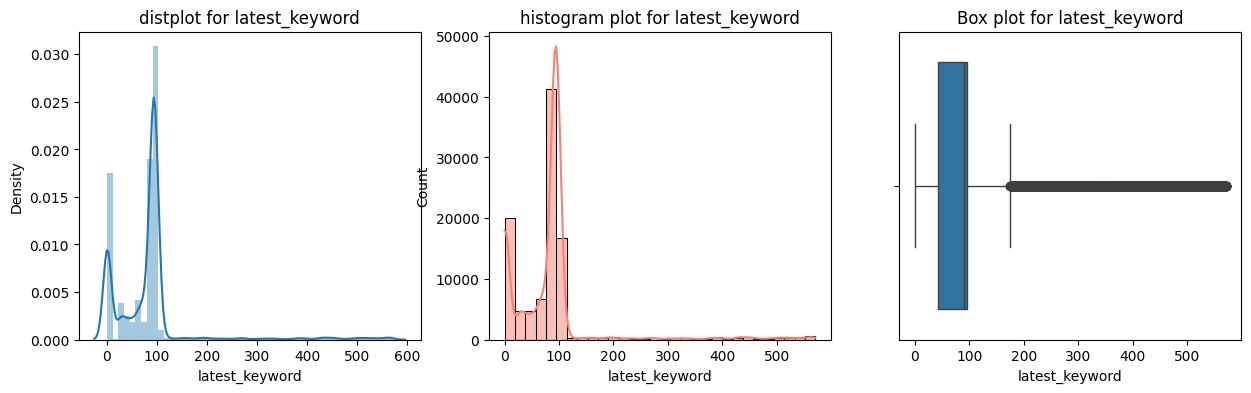

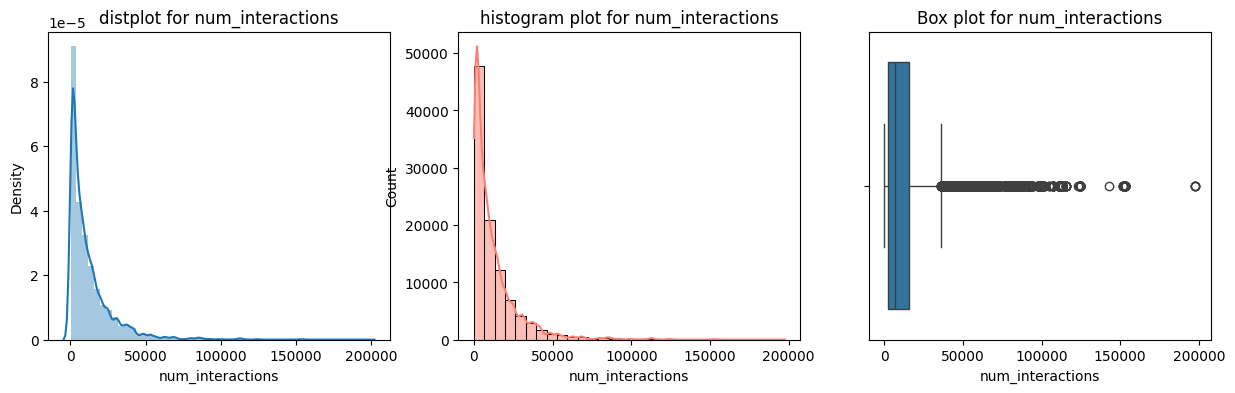

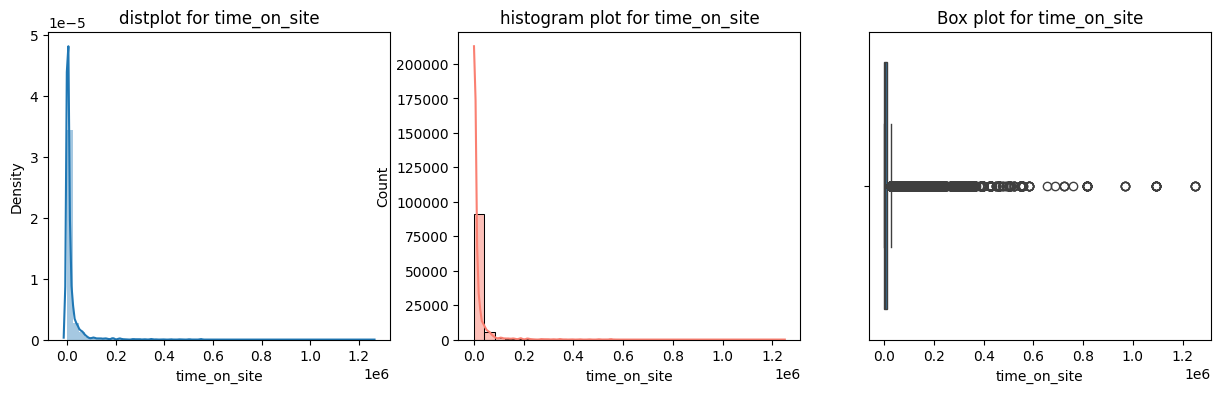

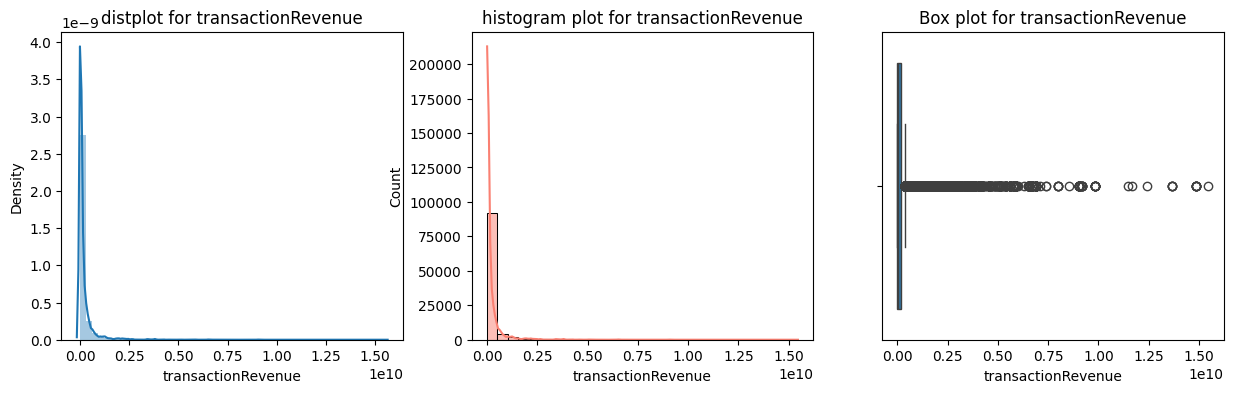

In [33]:
skewed_columns=["count_session", "count_hit", "historic_session_page", "avg_session_time", "avg_session_time_page", "single_page_rate",
     "earliest_visit_id", "earliest_visit_number", "visits_per_day", "earliest_keyword", "latest_keyword", "num_interactions",
     "time_on_site", "transactionRevenue"]

for i in skewed_columns:
    plot(final_df_2,i)


### Outliers Handling - Interquartile Range(IQR) Method


The Outlier Columns are:
1. count_session
2. count_hit
3. historic_session_page
4. avg_session_time
5. avg_session_time_page
6. single_page_rate
7. earliest_visit_id
8. earliest_visit_number
9. visits_per_day
10. bounce_rate
11. num_interactions
12. time_on_site
13. transactionRevenue

In [34]:
final_df_3= final_df_2.copy()
final_df_3.shape

(100000, 28)

In [35]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [36]:
outlier_columns= ["count_session", "count_hit", "historic_session_page", "avg_session_time",
                   "avg_session_time_page", "single_page_rate", "earliest_visit_id",
                   "earliest_visit_number", "visits_per_day", "earliest_keyword",
                   "latest_keyword",  "num_interactions", "time_on_site", "transactionRevenue"]
                  
for j in outlier_columns:
    outlier(final_df_3,j)

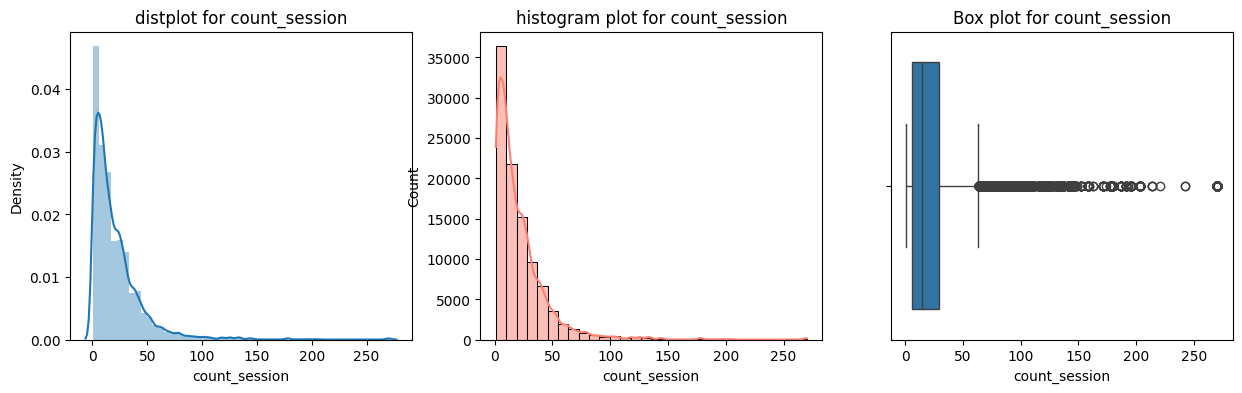

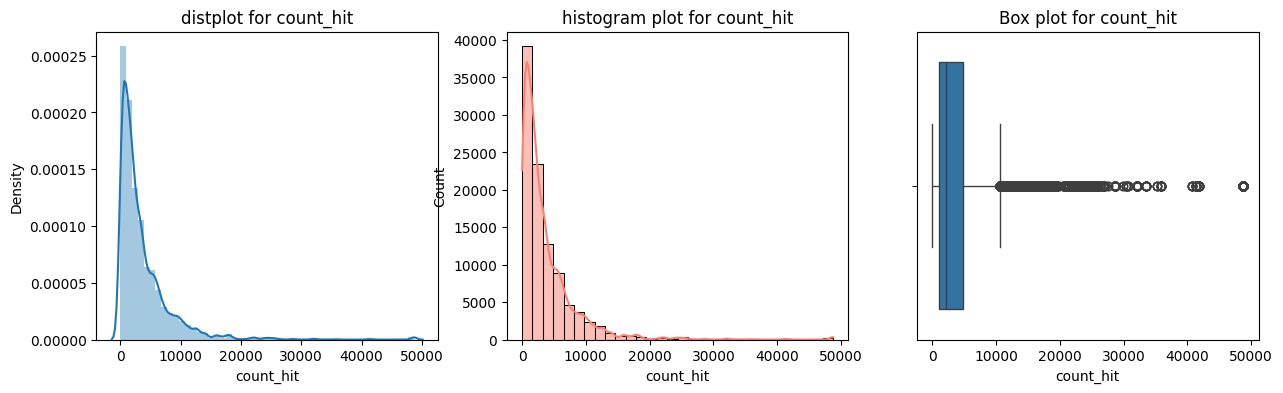

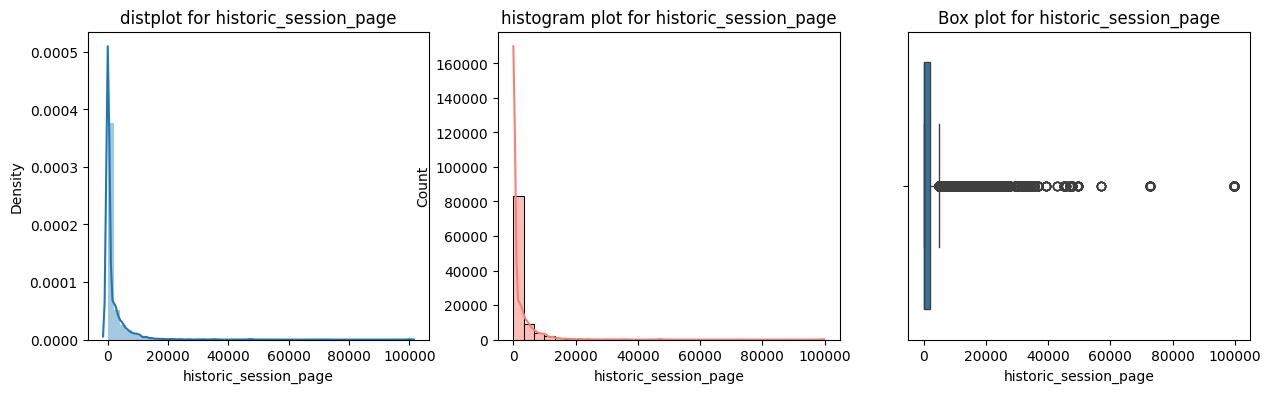

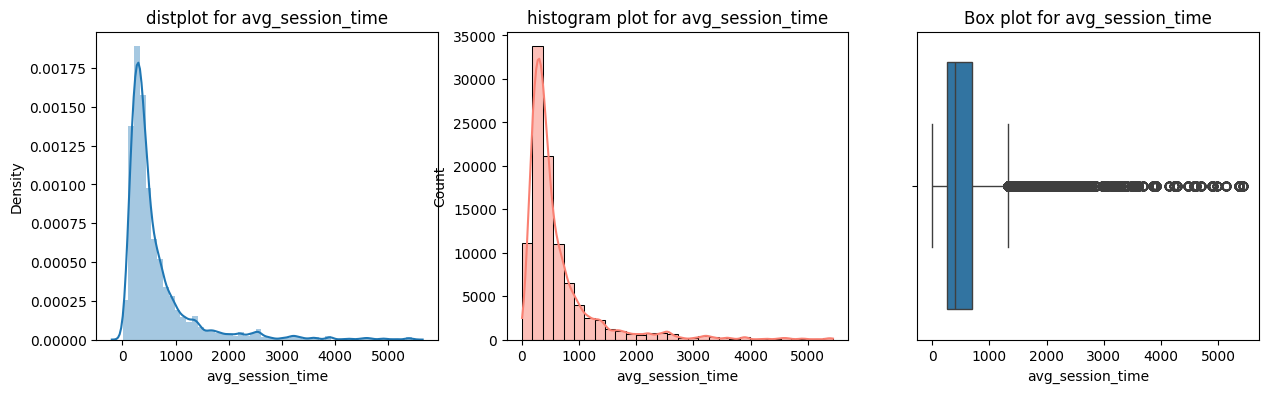

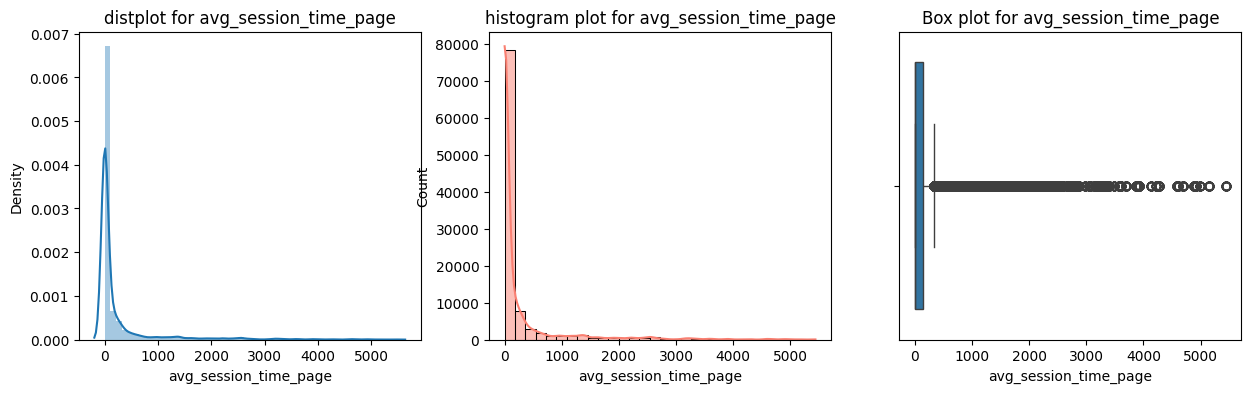

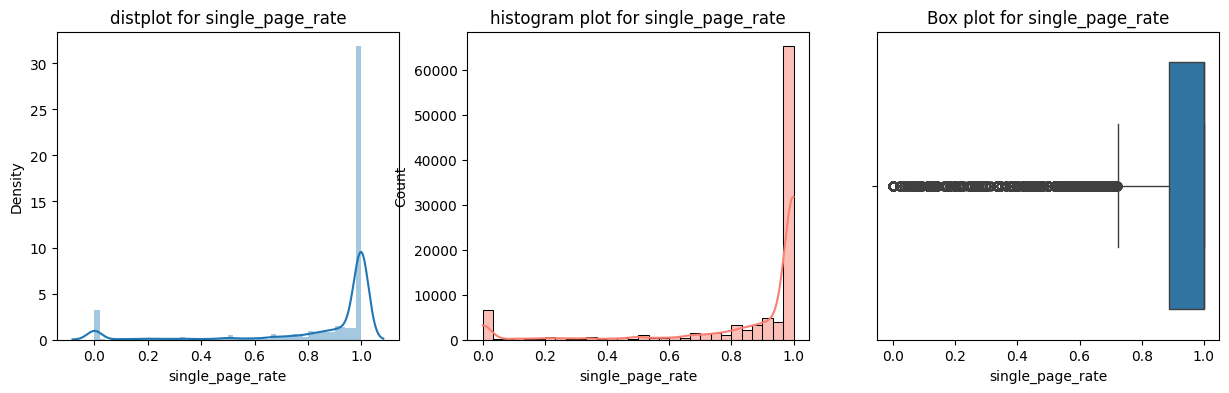

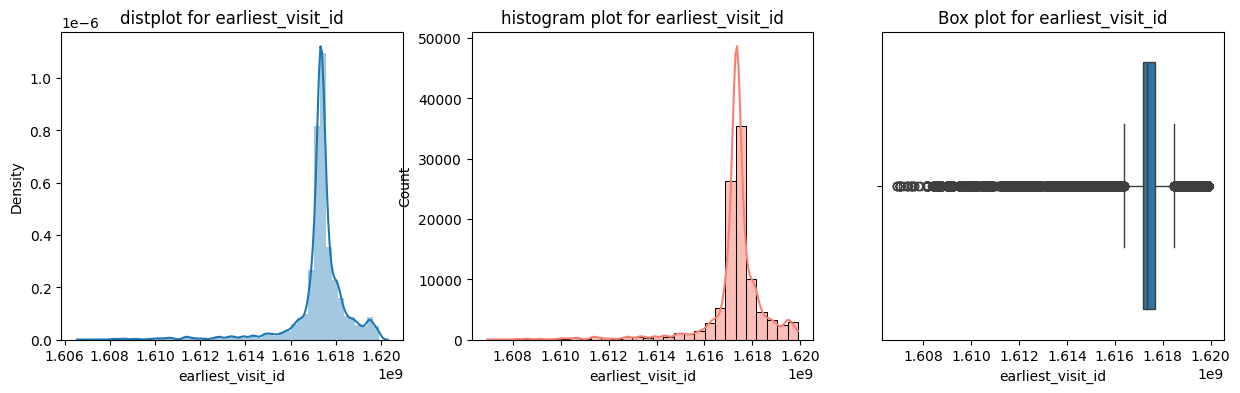

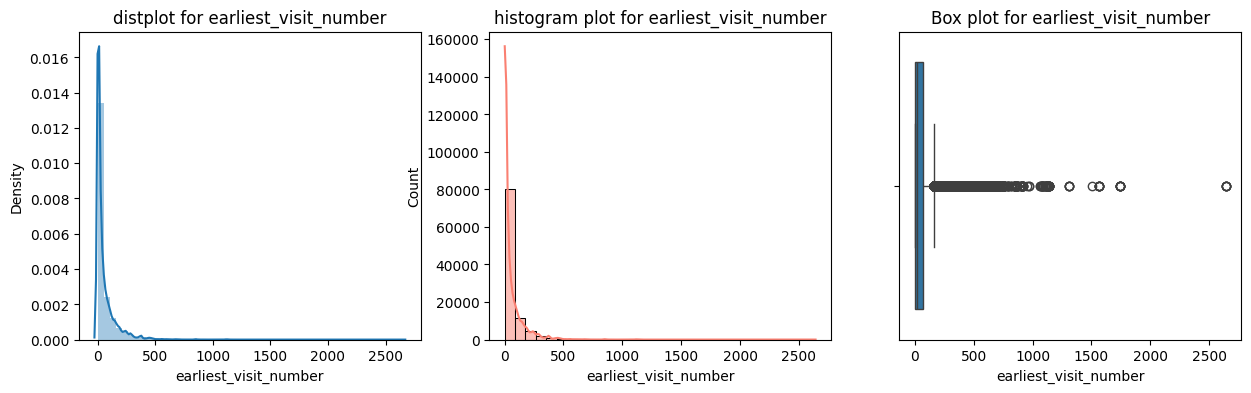

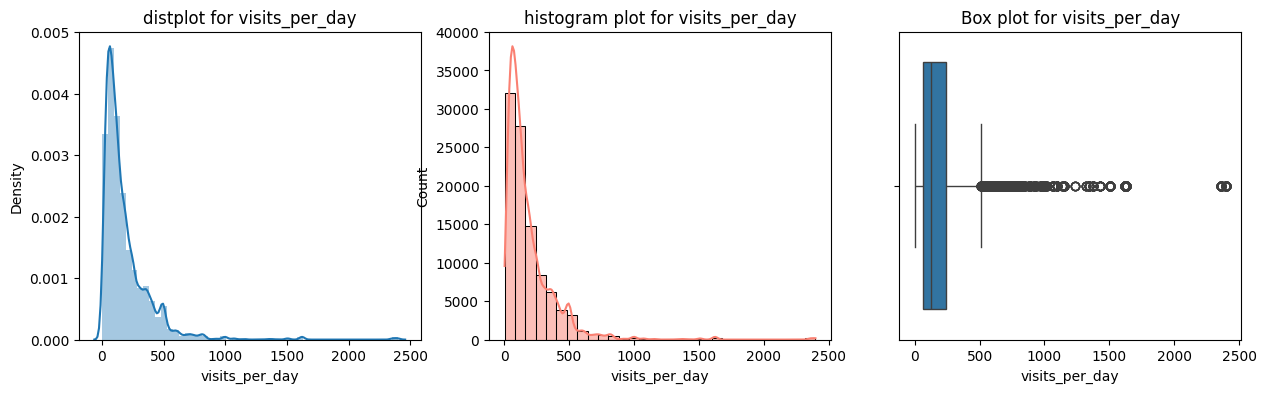

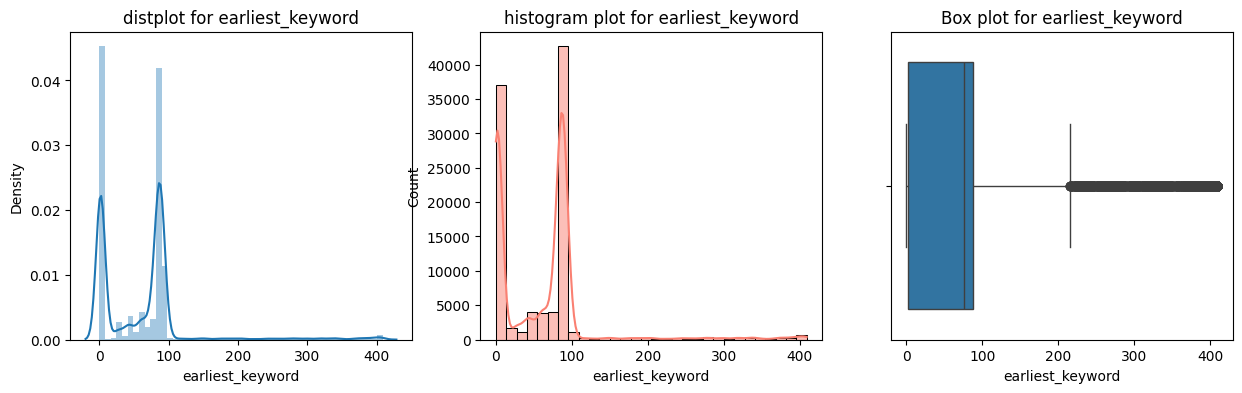

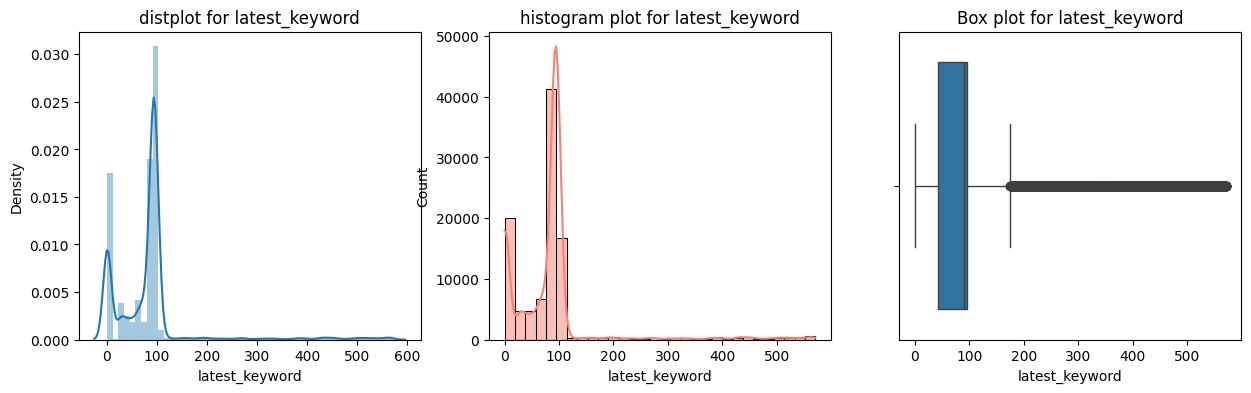

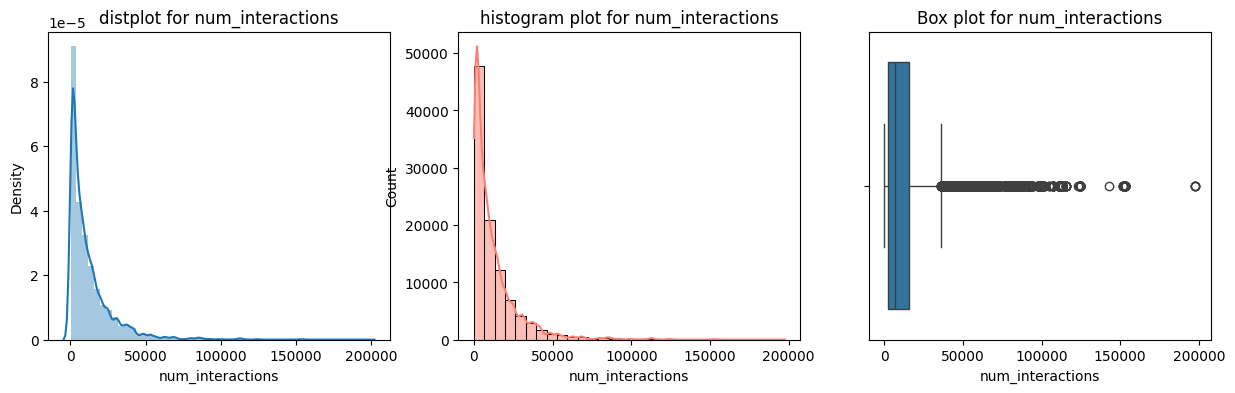

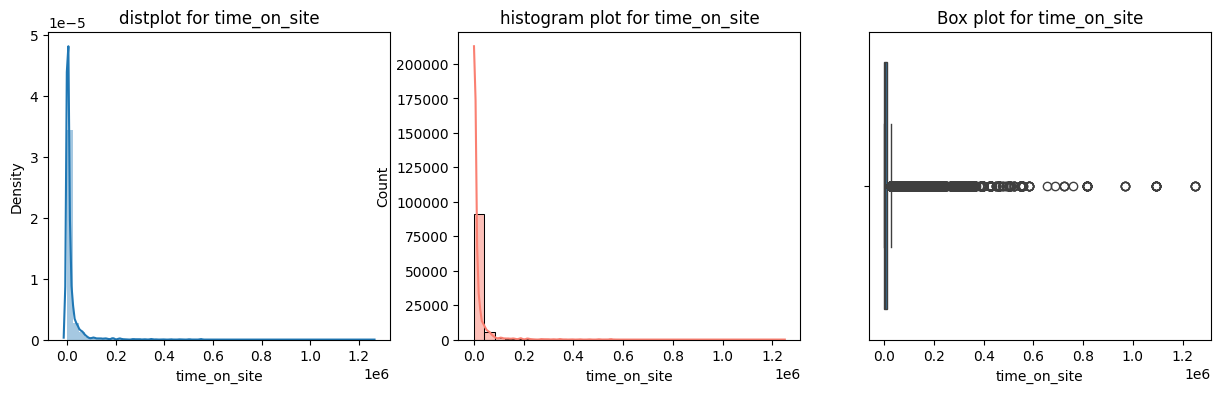

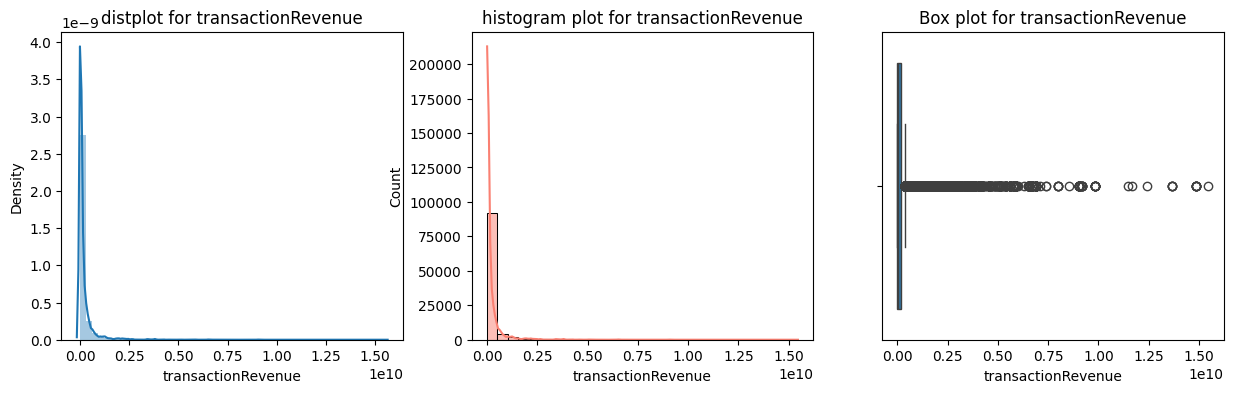

In [37]:
for k in outlier_columns:
    plot(final_df_3,k)

In [38]:
final_df_3

count_session  count_hit  totals_newVisits  device_browser  \
0           2.302585   7.085901                 0               5   
1           2.302585   7.085901                 0               5   
2           3.367296   7.504942                 0               5   
3           1.098612   5.703782                 0               5   
4           1.098612   5.703782                 0               5   
...              ...        ...               ...             ...   
99995       4.077537   9.420682                 0               5   
99996       4.077537   9.420682                 0               5   
99997       4.077537   9.420682                 0               5   
99998       4.077537   9.420682                 0               5   
99999       4.077537   9.420682                 0               5   

       device_operatingSystem  device_isMobile  device_deviceCategory  \
0                           1                1                      1   
1                           1                1                      1   
2                           1                1                      1   
3                           1                1                      1   
4                           1                1                      1   
...                       ...              ...                    ...   
99995                       6                1                      1   
99996                       6                1                      1   
99997                       6                1                      1   
99998                       6                1                      1   
99999                       6                1                      1   

       geoNetwork_region  historic_session_page  avg_session_time  ...  \
0                     71               7.134891          6.584331  ...   
1                     71               7.134891          6.584331  ...   
2                      2               8.509967          6.100799  ...   
3                      1               0.000000          6.670132  ...   
4                      1               0.000000          6.670132  ...   
...                  ...                    ...               ...  ...   
99995                 25               0.000000          6.184504  ...   
99996                 25               0.000000          6.184504  ...   
99997                 25               0.000000          6.184504  ...   
99998                 25               0.000000          6.184504  ...   
99999                 25               0.000000          6.184504  ...   

       earliest_medium  earliest_keyword  latest_keyword  \
0                    3          1.386294        2.556478   
1                    3          1.386294        2.556478   
2                    0          1.386294        2.556478   
3                    7          4.499810        4.574711   
4                    7          4.499810        4.574711   
...                ...               ...             ...   
99995                7          4.499810        4.574711   
99996                7          4.499810        4.574711   
99997                7          4.499810        4.574711   
99998                7          4.499810        4.574711   
99999                7          4.499810        4.574711   

       earliest_isTrueDirect  latest_isTrueDirect  num_interactions  \
0                          1                    1          7.550135   
1                          1                    1          7.550135   
2                          1                    1          8.254269   
3                          1                    1          6.385194   
4                          1                    1          6.385194   
...                      ...                  ...               ...   
99995                      1                    1         10.463103   
99996                      1                    1         10.463103   
99997                      1                    1   

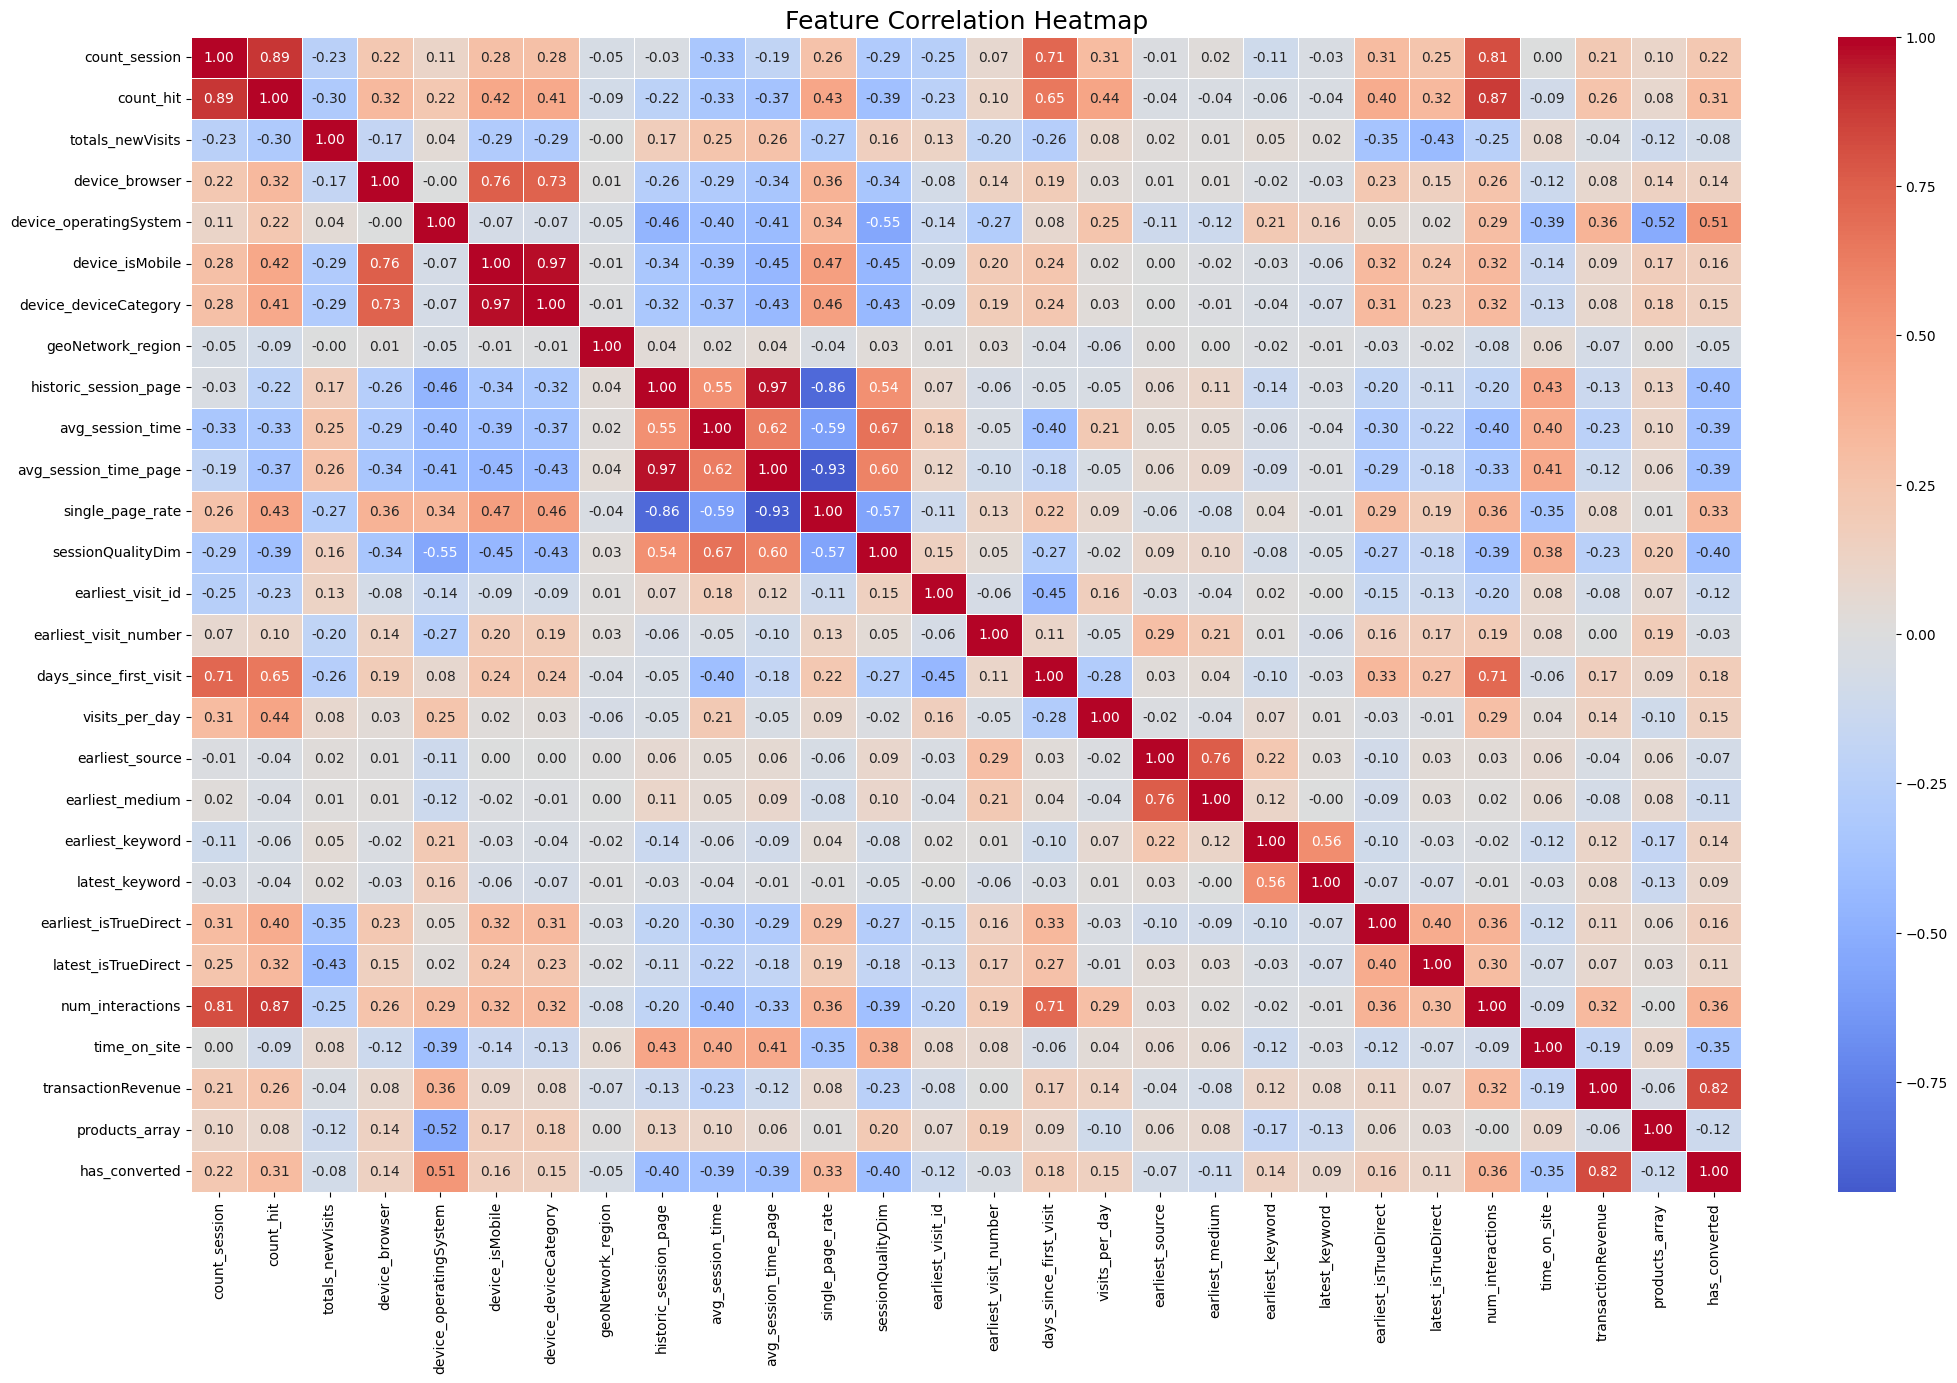

In [39]:
# Checking the correlation after the outlier recorrection

plt.figure(figsize=(25, 15))
sns.heatmap(final_df_3.corr(), annot=True, cmap="coolwarm", fmt=".2f", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.show()

In [251]:
# final_df_3.bounce_rate.value_counts()

In [ ]:
# final_df_3 = final_df_3.drop('bounce_rate', axis=1)

In [ ]:
# final_df_3

## Model Selection => Regression

In [40]:
final_df_4= final_df_3.copy()
final_df_4.shape

(100000, 28)

In [41]:
final_df_4.describe().T

count         mean          std        min  \
count_session           100000.0     2.661724     0.999695   0.693147   
count_hit               100000.0     7.567443     1.257506   4.479776   
totals_newVisits        100000.0     0.020380     0.141297   0.000000   
device_browser          100000.0     4.851230     0.803905   0.000000   
device_operatingSystem  100000.0     4.240320     2.332004   0.000000   
device_isMobile         100000.0     0.935860     0.245003   0.000000   
device_deviceCategory   100000.0     0.939270     0.252710   0.000000   
geoNetwork_region       100000.0    20.037300    19.693685   0.000000   
historic_session_page   100000.0     2.927313     3.899799   0.000000   
avg_session_time        100000.0     6.074867     0.767417   4.149827   
avg_session_time_page   100000.0     2.037761     2.819162   0.000000   
single_page_rate        100000.0     0.658832     0.053931   0.550251   
sessionQualityDim       100000.0    14.985540    18.581261   1.000000   
earliest_visit_id       100000.0    21.204097     0.000355  21.203453   
earliest_visit_number   100000.0     2.908855     1.595660   0.693147   
days_since_first_visit  100000.0    22.028900     9.814491   0.000000   
visits_per_day          100000.0     4.836205     0.917425   2.280839   
earliest_source         100000.0    21.954650     7.642196   0.000000   
earliest_medium         100000.0     6.848010     2.692754   0.000000   
earliest_keyword        100000.0     3.197048     1.675519   0.000000   
latest_keyword          100000.0     4.103638     0.867121   2.556478   
earliest_isTrueDirect   100000.0     0.901960     0.297370   0.000000   
latest_isTrueDirect     100000.0     0.897320     0.303542   0.000000   
num_interactions        100000.0     8.668843     1.365324   4.935542   
time_on_site            100000.0     7.472366     2.713142   1.990677   
transactionRevenue      100000.0    11.444481     9.163512   0.000000   
products_array          100000.0  1516.459580  1035.809400   0.000000   
has_converted           100000.0     0.517270     0.499704   0.000000   

                               25%          50%          75%          max  
count_session             1.945910     2.772589     3.401197     5.584128  
count_hit                 6.879356     7.700748     8.479076    10.794358  
totals_newVisits          0.000000     0.000000     0.000000     1.000000  
device_browser            5.000000     5.000000     5.000000     8.000000  
device_operatingSystem    1.000000     6.000000     6.000000     6.000000  
device_isMobile           1.000000     1.000000     1.000000     1.000000  
device_deviceCategory     1.000000     1.000000     1.000000     2.000000  
geoNetwork_region         1.000000    25.000000    25.000000    90.000000  
historic_session_page     0.000000     0.000000     7.593878    11.511895  
avg_session_time          5.580095     5.985311     6.533607     7.963875  
avg_session_time_page     0.000000     0.000000     4.908510     8.601902  
single_page_rate          0.635989     0.693147     0.693147     0.693147  
sessionQualityDim         2.000000     4.000000    21.000000   100.000000  
earliest_visit_id        21.203943    21.204061    21.204269    21.204759  
earliest_visit_number     1.386294     2.944439     4.219508     7.879670  
days_since_first_visit   19.000000    27.000000    29.000000    30.000000  
visits_per_day            4.212128     4.845592     5.499653     7.430942  
earliest_source          24.000000    24.000000    24.000000    35.000000  
earliest_medium           7.000000     7.000000     7.000000    17.000000  
earliest_keyword          1.386294     4.343805     4.488636     6.016157  
latest_keyword            3.761200     4.521789     4.564348     5.769070  
earliest_isTrueDirect     1.000000     1.000000     1.000000     1.000000  
latest_isTrueDirect       1.000000     1.000000     1.000000     1.000000  
num_interactions          7.781034     8.859505     9.678029    12.194157  
time_on_s

In [42]:
from sklearn.model_selection import train_test_split

X = final_df_4.drop(columns=['has_converted'])  # Target variable
y = final_df_4['has_converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
print(X.shape, y.shape)

(100000, 27) (100000,)


In [45]:
final_df_4.head(2)

count_session  count_hit  totals_newVisits  device_browser  \
0       2.302585   7.085901                 0               5   
1       2.302585   7.085901                 0               5   

   device_operatingSystem  device_isMobile  device_deviceCategory  \
0                       1                1                      1   
1                       1                1                      1   

   geoNetwork_region  historic_session_page  avg_session_time  ...  \
0                 71               7.134891          6.584331  ...   
1                 71               7.134891          6.584331  ...   

   earliest_medium  earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                3          1.386294        2.556478                      1   
1                3          1.386294        2.556478                      1   

   latest_isTrueDirect  num_interactions  time_on_site  transactionRevenue  \
0                    1          7.550135      8.633731                 0.0   
1                    1          7.550135      8.633731                 0.0   

   products_array  has_converted  
0            2265              0  
1            2265              0  

[2 rows x 28 columns]

In [46]:
final_df_5 = final_df_4.drop(columns=['has_converted']) 
final_df_5

count_session  count_hit  totals_newVisits  device_browser  \
0           2.302585   7.085901                 0               5   
1           2.302585   7.085901                 0               5   
2           3.367296   7.504942                 0               5   
3           1.098612   5.703782                 0               5   
4           1.098612   5.703782                 0               5   
...              ...        ...               ...             ...   
99995       4.077537   9.420682                 0               5   
99996       4.077537   9.420682                 0               5   
99997       4.077537   9.420682                 0               5   
99998       4.077537   9.420682                 0               5   
99999       4.077537   9.420682                 0               5   

       device_operatingSystem  device_isMobile  device_deviceCategory  \
0                           1                1                      1   
1                           1                1                      1   
2                           1                1                      1   
3                           1                1                      1   
4                           1                1                      1   
...                       ...              ...                    ...   
99995                       6                1                      1   
99996                       6                1                      1   
99997                       6                1                      1   
99998                       6                1                      1   
99999                       6                1                      1   

       geoNetwork_region  historic_session_page  avg_session_time  ...  \
0                     71               7.134891          6.584331  ...   
1                     71               7.134891          6.584331  ...   
2                      2               8.509967          6.100799  ...   
3                      1               0.000000          6.670132  ...   
4                      1               0.000000          6.670132  ...   
...                  ...                    ...               ...  ...   
99995                 25               0.000000          6.184504  ...   
99996                 25               0.000000          6.184504  ...   
99997                 25               0.000000          6.184504  ...   
99998                 25               0.000000          6.184504  ...   
99999                 25               0.000000          6.184504  ...   

       earliest_source  earliest_medium  earliest_keyword  latest_keyword  \
0                   25                3          1.386294        2.556478   
1                   25                3          1.386294        2.556478   
2                    0                0          1.386294        2.556478   
3                   24                7          4.499810        4.574711   
4                   24                7          4.499810        4.574711   
...                ...              ...               ...             ...   
99995               24                7          4.499810        4.574711   
99996               24                7          4.499810        4.574711   
99997               24                7          4.499810        4.574711   
99998               24                7          4.499810        4.574711   
99999               24                7          4.499810        4.574711   

       earliest_isTrueDirect  latest_isTrueDirect  num_interactions  \
0                          1                    1          7.550135   
1                          1                    1          7.550135   
2                          1                    1          8.254269   
3                          1                    1          6.385194   
4                          1                    1          6.385194   
...                      ...                  ...            

In [47]:
final_df_5.nunique()

count_session              157
count_hit                 4422
totals_newVisits             2
device_browser               9
device_operatingSystem       7
device_isMobile              2
device_deviceCategory        3
geoNetwork_region           91
historic_session_page     3066
avg_session_time          8048
avg_session_time_page     3698
single_page_rate           332
sessionQualityDim           67
earliest_visit_id         7540
earliest_visit_number      528
days_since_first_visit      31
visits_per_day            7537
earliest_source             36
earliest_medium             18
earliest_keyword           410
latest_keyword             310
earliest_isTrueDirect        2
latest_isTrueDirect          2
num_interactions          6802
time_on_site              6003
transactionRevenue        4755
products_array            3559
dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [50]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 27)
X_test shape: (20000, 27)
y_train shape: (80000,)
y_test shape: (20000,)


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': log_model, 
    'Random Forest': rf_model, 
    'XGBoost': xgb_model
}

for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Convert probabilities to binary predictions if needed
    if name == "XGBoost":  # XGBoost might return probabilities instead of 0/1
        y_pred = (y_pred >= 0.5).astype(int)

    # Model Performance Metrics
    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")



Logistic Regression Model Performance:
Accuracy: 0.9396
Precision: 0.9446
Recall: 0.9378
F1-Score: 0.9412

Random Forest Model Performance:
Accuracy: 0.9981
Precision: 0.9982
Recall: 0.9983
F1-Score: 0.9982

XGBoost Model Performance:
Accuracy: 0.9983
Precision: 0.9986
Recall: 0.9982
F1-Score: 0.9984


In [53]:
import pickle

# Save XGBoost Model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

In [ ]:
# with open("Guuvi_Final_Project_1_Model.pkl", "rb") as f:
#     loaded_model = pickle.load(f)

In [ ]:
# loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [265]:
# def predict_live_data(live_data, model):
#     prediction = model.predict(live_data)
#     return prediction

# # Example usage (assuming `live_data` is preprocessed and ready)
# live_predictions = predict_live_data(final_df_1, xgb_model)  # Use the best model


# Below i am working for the streamlit part, how to display the values in the streamlit input page

In [266]:
compare_df = pd.read_csv('C:/Sudhakar/Projects/Guvi Final Project/Dataset and Document/classification_data.csv')
compare_df

count_session  count_hit channelGrouping  totals_newVisits  \
0                  9       1194         (Other)                 0   
1                  9       1194         (Other)                 0   
2                 28       1816     Paid Search                 0   
3                  2        299     Paid Search                 0   
4                  2        299     Paid Search                 0   
...              ...        ...             ...               ...   
99995             58      12340     Paid Search                 0   
99996             58      12340     Paid Search                 0   
99997             58      12340     Paid Search                 0   
99998             58      12340     Paid Search                 0   
99999             58      12340     Paid Search                 0   

        device_browser device_operatingSystem  device_isMobile  \
0      GoogleAnalytics                Android             True   
1      GoogleAnalytics                Android             True   
2      GoogleAnalytics                Android             True   
3      GoogleAnalytics                Android             True   
4      GoogleAnalytics                Android             True   
...                ...                    ...              ...   
99995  GoogleAnalytics                    iOS             True   
99996  GoogleAnalytics                    iOS             True   
99997  GoogleAnalytics                    iOS             True   
99998  GoogleAnalytics                    iOS             True   
99999  GoogleAnalytics                    iOS             True   

      device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                    mobile           Sharjah              25.3463  ...   
1                    mobile           Sharjah              25.3463  ...   
2                    mobile             Ajman              25.4052  ...   
3                    mobile         Abu Dhabi              24.4539  ...   
4                    mobile         Abu Dhabi              24.4539  ...   
...                     ...               ...                  ...  ...   
99995                mobile             Dubai              25.2048  ...   
99996                mobile             Dubai              25.2048  ...   
99997                mobile             Dubai              25.2048  ...   
99998                mobile             Dubai              25.2048  ...   
99999                mobile             Dubai              25.2048  ...   

                    latest_keyword  earliest_isTrueDirect  \
0                        (not set)                   True   
1                        (not set)                   True   
2             (automatic matching)                   True   
3      custom0==marketplace&+id==*                   True   
4      custom0==marketplace&+id==*                   True   
...                            ...                    ...   
99995  custom0==marketplace&+id==*                   True   
99996  custom0==marketplace&+id==*                   True   
99997  custom0==marketplace&+id==*                   True   
99998  custom0==marketplace&+id==*                   True   
99999  custom0==marketplace&+id==*                   True   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                     True              1900        0          5617   
1                     True              1900        0          5617   
2                     True              3843        0         77417   
3                     True               592        0          1576   
4                     True               592        0          1576   
...                    ...               ...      ...           ...   
99995                 True             34999        0             0   
99996                 True             34999        0             0   
99997                 True             34999        0             0   
99998                 True             34

In [267]:
compare_df.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [268]:
# Define the columns that should be retained
required_columns = [
    'count_session', 'count_hit', 'totals_newVisits', 'device_browser',
    'device_operatingSystem', 'device_isMobile', 'device_deviceCategory',
    'geoNetwork_region', 'historic_session_page', 'avg_session_time',
    'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
    'earliest_visit_id', 'earliest_visit_number', 'days_since_first_visit',
    'visits_per_day', 'earliest_source', 'earliest_medium',
    'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
    'latest_isTrueDirect', 'num_interactions', 'time_on_site',
    'transactionRevenue', 'products_array'
]

# Identify columns to drop
columns_to_drop = set(compare_df.columns) - set(required_columns)

# Drop the extra columns
compare_df_1 = compare_df[required_columns]


In [269]:
compare_df_1.head()

count_session  count_hit  totals_newVisits   device_browser  \
0              9       1194                 0  GoogleAnalytics   
1              9       1194                 0  GoogleAnalytics   
2             28       1816                 0  GoogleAnalytics   
3              2        299                 0  GoogleAnalytics   
4              2        299                 0  GoogleAnalytics   

  device_operatingSystem  device_isMobile device_deviceCategory  \
0                Android             True                mobile   
1                Android             True                mobile   
2                Android             True                mobile   
3                Android             True                mobile   
4                Android             True                mobile   

  geoNetwork_region  historic_session_page  avg_session_time  ...  \
0           Sharjah                   1254        722.666667  ...   
1           Sharjah                   1254        722.666667  ...   
2             Ajman                   4963        445.214286  ...   
3         Abu Dhabi                      0        787.500000  ...   
4         Abu Dhabi                      0        787.500000  ...   

   earliest_source  earliest_medium             earliest_keyword  \
0         gulfnews              app                    (not set)   
1         gulfnews              app                    (not set)   
2         (direct)           (none)                    (not set)   
3           google              cpc  custom0==marketplace&+id==*   
4           google              cpc  custom0==marketplace&+id==*   

                latest_keyword  earliest_isTrueDirect  latest_isTrueDirect  \
0                    (not set)                   True                 True   
1                    (not set)                   True                 True   
2         (automatic matching)                   True                 True   
3  custom0==marketplace&+id==*                   True                 True   
4  custom0==marketplace&+id==*                   True                 True   

   num_interactions time_on_site transactionRevenue  \
0              1900         5617                  0   
1              1900         5617                  0   
2              3843        77417         1477195214   
3               592         1576                  0   
4               592         1576                  0   

                                      products_array  
0                               food////food////food  
1                               food////food////food  
2  (not set)////baby_products--milk,_food_&_juice...  
3                                       food////food  
4                                       food////food  

[5 rows x 27 columns]

In [270]:
final_df_5.head(5)

count_session  count_hit  totals_newVisits  device_browser  \
0       2.302585   7.085901                 0               5   
1       2.302585   7.085901                 0               5   
2       3.367296   7.504942                 0               5   
3       1.098612   5.703782                 0               5   
4       1.098612   5.703782                 0               5   

   device_operatingSystem  device_isMobile  device_deviceCategory  \
0                       1                1                      1   
1                       1                1                      1   
2                       1                1                      1   
3                       1                1                      1   
4                       1                1                      1   

   geoNetwork_region  historic_session_page  avg_session_time  ...  \
0                 71               7.134891          6.584331  ...   
1                 71               7.134891          6.584331  ...   
2                  2               8.509967          6.100799  ...   
3                  1               0.000000          6.670132  ...   
4                  1               0.000000          6.670132  ...   

   earliest_source  earliest_medium  earliest_keyword  latest_keyword  \
0               25                3          1.386294        2.556478   
1               25                3          1.386294        2.556478   
2                0                0          1.386294        2.556478   
3               24                7          4.499810        4.574711   
4               24                7          4.499810        4.574711   

   earliest_isTrueDirect  latest_isTrueDirect  num_interactions  time_on_site  \
0                      1                    1          7.550135      8.633731   
1                      1                    1          7.550135      8.633731   
2                      1                    1          8.254269     11.256975   
3                      1                    1          6.385194      7.363280   
4                      1                    1          6.385194      7.363280   

   transactionRevenue  products_array  
0            0.000000            2265  
1            0.000000            2265  
2           21.113411             898  
3            0.000000            2234  
4            0.000000            2234  

[5 rows x 27 columns]

In [271]:
final_df_5.columns

Index(['count_session', 'count_hit', 'totals_newVisits', 'device_browser',
       'device_operatingSystem', 'device_isMobile', 'device_deviceCategory',
       'geoNetwork_region', 'historic_session_page', 'avg_session_time',
       'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
       'earliest_visit_id', 'earliest_visit_number', 'days_since_first_visit',
       'visits_per_day', 'earliest_source', 'earliest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'time_on_site',
       'transactionRevenue', 'products_array'],
      dtype='object')

In [272]:
compare_df_1.latest_isTrueDirect.value_counts()

latest_isTrueDirect
True     89732
False    10268
Name: count, dtype: int64

In [273]:
final_df_5.latest_isTrueDirect.value_counts()

latest_isTrueDirect
1    89732
0    10268
Name: count, dtype: int64